# Introduction
This notebook was created as part of a Machine Learning academic course. Any feedback is more than welcome.

## Variables
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)


In [1072]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sklearn as sk

### Some personal settings

In [542]:
#plt.rcParams.keys()

In [769]:
%matplotlib inline

plt.style.use('seaborn')
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['xtick.labelsize'] = 14 
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 18

sns.set(font_scale=1.8)
sns.set(style="darkgrid")

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', lambda x: '%.4f' % x)
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Load Data

In [1627]:
data_dir = Path("datasets")
# Default of credit card clients: predict DEFAULT
filepath = data_dir / 'default' / 'default of credit card clients.csv'
df = pd.read_csv(filepath)

Check how many examples and how many features are in the dataset

In [1630]:
df.shape
df.shape[0] - df.dropna().shape[0]


68

We have 30000 examples and 25 columns (24 features and one label). Let's look at the data

In [597]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Data Cleaning & Preprocessing

Change column names to be more convenient 

In [1633]:
df = df.rename(columns=str.lower)
df = df.rename(columns={'education': 'educ', 'marriage': 'status', 'pay_0': 'pay_1'})

Drop unneeded columns

In [1634]:
df = df.drop(columns=['id'])

In [1635]:
df.columns.to_list()

['limit_bal',
 'sex',
 'educ',
 'status',
 'age',
 'pay_1',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'default']

Let's look for missing data

In [1636]:
df.isna().any()

limit_bal    False
sex          False
educ          True
status        True
age          False
pay_1        False
pay_2        False
pay_3        False
pay_4        False
pay_5        False
pay_6        False
bill_amt1    False
bill_amt2    False
bill_amt3    False
bill_amt4    False
bill_amt5    False
bill_amt6    False
pay_amt1     False
pay_amt2     False
pay_amt3     False
pay_amt4     False
pay_amt5     False
pay_amt6     False
default      False
dtype: bool

In [1637]:
df.isna().mean()

limit_bal   0.00
sex         0.00
educ        0.00
status      0.00
age         0.00
pay_1       0.00
pay_2       0.00
pay_3       0.00
pay_4       0.00
pay_5       0.00
pay_6       0.00
bill_amt1   0.00
bill_amt2   0.00
bill_amt3   0.00
bill_amt4   0.00
bill_amt5   0.00
bill_amt6   0.00
pay_amt1    0.00
pay_amt2    0.00
pay_amt3    0.00
pay_amt4    0.00
pay_amt5    0.00
pay_amt6    0.00
default     0.00
dtype: float64

Since the number of null values is really small, we'll simply drop them.

In [1638]:
df = df.dropna()
df.default.value_counts(dropna=False)

0    23301
1     6631
Name: default, dtype: int64

### Let's make sure all columns are as documented.

In [1639]:
df.describe()

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
count,29932.00,29932.00,29932.00,29932.00,29932.00,29932.00,29932.00,29932.00,29932.00,29932.00,29932.00,29932.00,29932.00,29932.00,29932.00,29932.00,29932.00,29932.00,29932.00,29932.00,29932.00
mean,167523.38,35.48,-0.02,-0.13,-0.17,-0.22,-0.27,-0.29,51297.39,49242.86,47077.03,43320.70,40367.55,38927.27,5659.60,5923.50,5226.16,4830.18,4805.27,5221.91,0.22
std,129821.21,9.22,1.12,1.20,1.20,1.17,1.13,1.15,73694.49,71230.37,69404.73,64385.86,60845.49,59601.23,16555.87,23060.20,17620.77,15680.85,15294.07,17795.29,0.42
min,10000.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,3577.00,2989.75,2685.50,2339.75,1772.75,1261.00,1000.00,836.00,390.00,298.00,255.00,122.00,0.00
50%,140000.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,22420.50,21234.50,20111.50,19068.50,18125.50,17111.50,2100.00,2010.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,240000.00,41.00,0.00,0.00,0.00,0.00,0.00,0.00,67283.50,64136.00,60252.50,54613.25,50253.50,49260.25,5006.00,5000.00,4507.25,4015.00,4040.25,4000.00,0.00
max,1000000.00,79.00,8.00,8.00,8.00,8.00,8.00,8.00,964511.00,983931.00,1664089.00,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


According to our documentation, the PAY_n variables indicate the number of months of delay and indicates "pay duly" with -1. Then what is -2 and 0? It seems to me and to other kaggleres the label has to be adjusted to 0 for pay duly. Let's fix this.

In [1640]:
pay_cols = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
pay_cols = [col.lower() for col in pay_cols]

for col in pay_cols:
    fil = (df[col] == -2) | (df[col] == -1) | (df[col] == 0)
    df.loc[fil, col] = 0
    
df.pay_1.value_counts()

0    23129
1     3678
2     2663
3      322
4       76
5       25
8       19
6       11
7        9
Name: pay_1, dtype: int64

Categorical values to 1-hot

In [1641]:
df_no_dummies = df
df = pd.get_dummies(df)
cols = [col.replace(' ', '_') for col in df.columns]
df.columns = cols
df.head()

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,sex_female,sex_male,educ_graduate_school,educ_high_school,educ_others,educ_university,educ_unknown,status_married,status_others,status_single
0,20000,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
1,120000,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,0,0,0,0,1,0,0,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,1,0,0,0,0,1,0,0,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,0,0,0,0,1,0,1,0,0
4,50000,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,0,0,0,1,0,1,0,0


Check all values are indeed numeric

In [903]:
df.dtypes

limit_bal               int64
age                     int64
pay_1                   int64
pay_2                   int64
pay_3                   int64
pay_4                   int64
pay_5                   int64
pay_6                   int64
bill_amt1               int64
bill_amt2               int64
bill_amt3               int64
bill_amt4               int64
bill_amt5               int64
bill_amt6               int64
pay_amt1                int64
pay_amt2                int64
pay_amt3                int64
pay_amt4                int64
pay_amt5                int64
pay_amt6                int64
default                 int64
sex_female              uint8
sex_male                uint8
educ_graduate_school    uint8
educ_high_school        uint8
educ_others             uint8
educ_university         uint8
educ_unknown            uint8
status_married          uint8
status_others           uint8
status_single           uint8
dtype: object

All features are numeric, that's great.

# Data exploration

What are the statistics of the data?

In [904]:
df.describe()

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,sex_female,sex_male,educ_graduate_school,educ_high_school,educ_others,educ_university,educ_unknown,status_married,status_others,status_single
count,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000
mean,167523.3757,35.4797,0.3568,0.3201,0.3039,0.2587,0.2216,0.2266,51297.3861,49242.8626,47077.0300,43320.6995,40367.5486,38927.2671,5659.6030,5923.5015,5226.1588,4830.1801,4805.2693,5221.9064,0.2215,0.6036,0.3964,0.3535,0.1628,0.0041,0.4685,0.0111,0.4562,0.0108,0.5330
std,129821.2100,9.2190,0.7605,0.8018,0.7905,0.7612,0.7179,0.7156,73694.4893,71230.3738,69404.7344,64385.8571,60845.4878,59601.2311,16555.8746,23060.1997,17620.7737,15680.8497,15294.0668,17795.2850,0.4153,0.4892,0.4892,0.4781,0.3692,0.0640,0.4990,0.1046,0.4981,0.1033,0.4989
min,10000.0000,21.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-165580.0000,-69777.0000,-157264.0000,-170000.0000,-81334.0000,-339603.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,50000.0000,28.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3577.0000,2989.7500,2685.5000,2339.7500,1772.7500,1261.0000,1000.0000,836.0000,390.0000,298.0000,255.0000,122.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,140000.0000,34.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,22420.5000,21234.5000,20111.5000,19068.5000,18125.5000,17111.5000,2100.0000,2010.0000,1800.0000,1500.0000,1500.0000,1500.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
75%,240000.0000,41.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,67283.5000,64136.0000,60252.5000,54613.2500,50253.5000,49260.2500,5006.0000,5000.0000,4507.2500,4015.0000,4040.2500,4000.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000
max,1000000.0000,79.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,964511.0000,983931.0000,1664089.0000,891586.0000,927171.0000,961664.0000,873552.0000,1684259.0000,896040.0000,621000.0000,426529.0000,528666.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Let's take a look at the some features distributions

1.0000   0.6036
0.0000   0.3964
Name: sex_female, dtype: float64

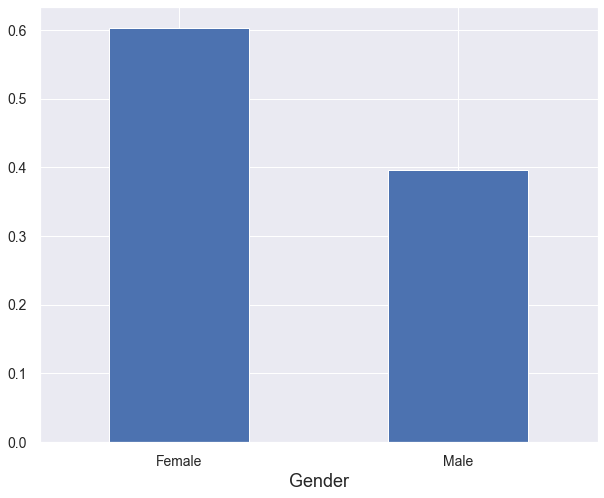

In [766]:
ax = df.sex_female.value_counts(normalize=True).plot(kind='bar')
ax.set_xlabel("Gender", size=18)
ax.set_xticklabels(['Female', 'Male'], rotation = 0)
ax.tick_params(axis='both', which='major', labelsize=14)
df.sex_female.value_counts(normalize=True)

university        0.4685
graduate school   0.3535
high school       0.1628
unknown           0.0111
others            0.0041
Name: educ, dtype: float64

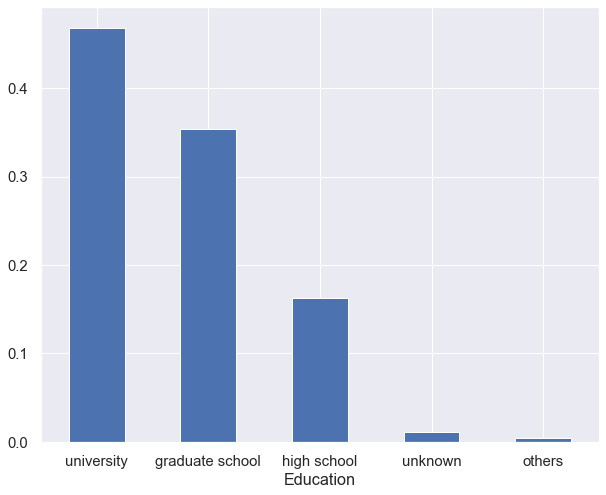

In [765]:
ax = df_no_dummies.educ.value_counts(normalize=True).plot(kind='bar')
ax.set_xlabel("Education")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)#, ha="right")
df_no_dummies.educ.value_counts(normalize=True)

single    0.5330
married   0.4562
others    0.0108
Name: status, dtype: float64

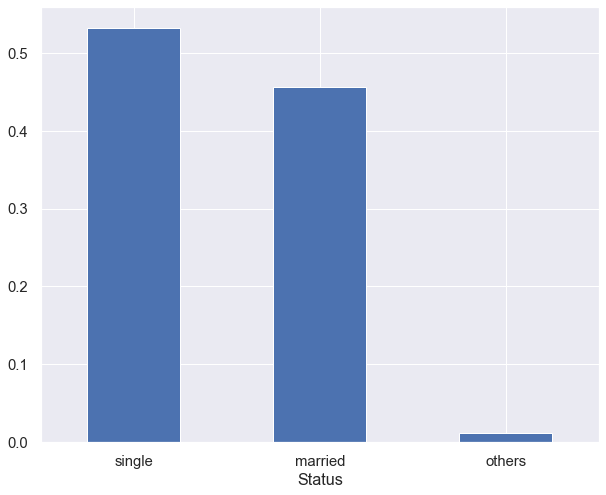

In [767]:
ax = df_no_dummies.status.value_counts(normalize=True).plot(kind='bar')
ax.set_xlabel("Status")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)  #, ha="right")
df_no_dummies.status.value_counts(normalize=True)

0.0000   0.7785
1.0000   0.2215
Name: default, dtype: float64

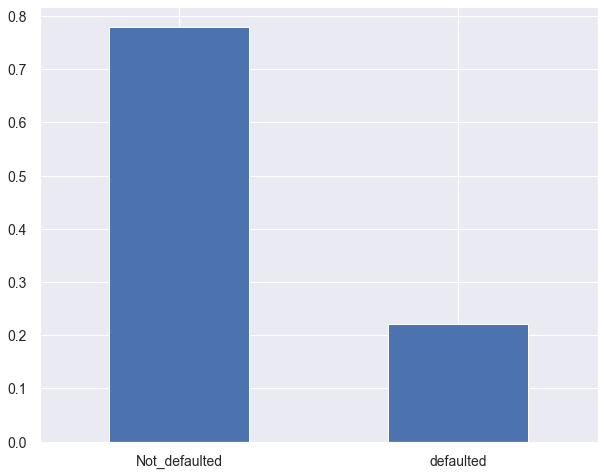

In [779]:
sns.set(font_scale=1.6)

ax = df.default.value_counts(normalize=True).plot(kind='bar')
ax.set_xticklabels(['Not_defaulted', 'defaulted'], rotation = 0)
ax.tick_params(axis='both', which='major', labelsize=14)
df.default.value_counts(normalize=True)

About ~22% of the clients defaulted. A small unbalanced dataset, we'll remember that.

Distribution of the age in our data:

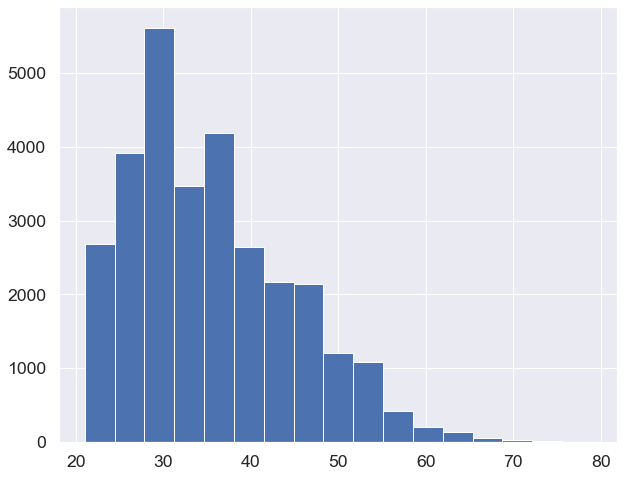

In [778]:
sns.set(font_scale=1.6)

plt.title('Age distribution')
df.age.hist(bins=17)

Hmm, quite normal I'd say(based on the fact that the minimum age is 21).


Here we can see the distribution of the credit that was given

Text(0.5, 1.0, 'Credit(Limit_Bal) distribution')

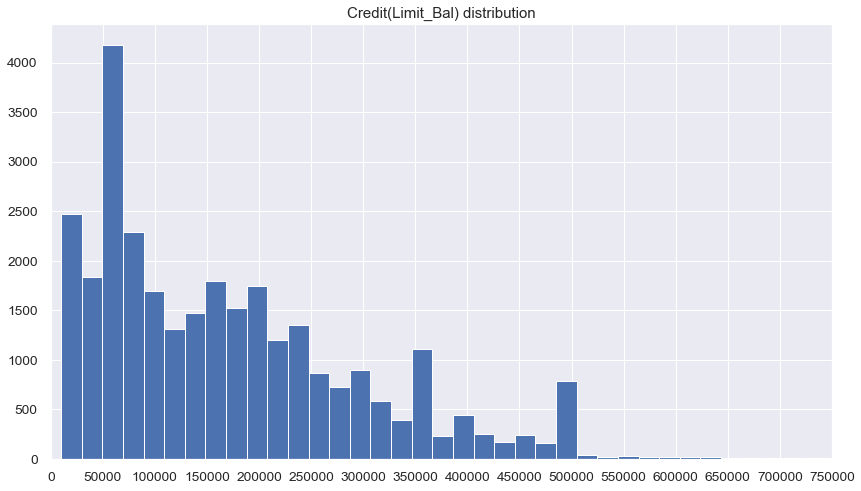

In [1535]:
sns.set(font_scale=1.25)

plt.figure(figsize=(14,8))
ax = df.limit_bal.hist(bins=50)
ax.set_xticks(np.linspace(0, 1000000, 21))
ax.set_xlim(0,750000)
plt.title('Credit(Limit_Bal) distribution')


Column pay_1 :
 AxesSubplot(0.125,0.125;0.775x0.755) 




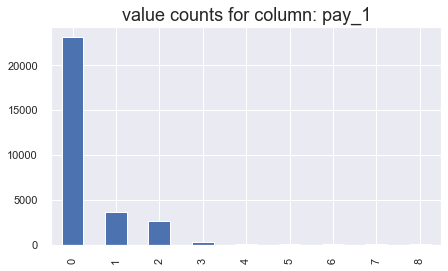

Column pay_2 :
 AxesSubplot(0.125,0.125;0.775x0.755) 




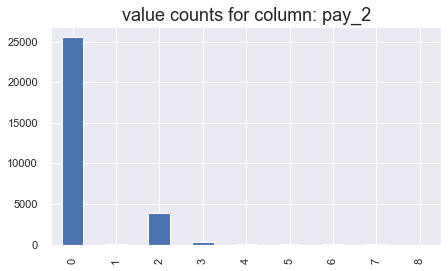

Column pay_3 :
 AxesSubplot(0.125,0.125;0.775x0.755) 




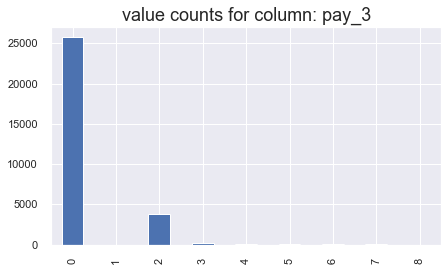

Column pay_4 :
 AxesSubplot(0.125,0.125;0.775x0.755) 




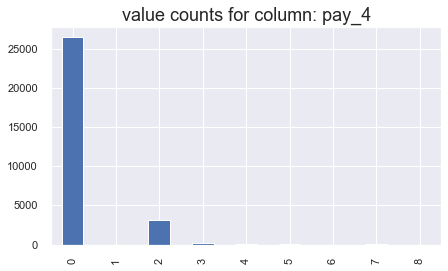

Column pay_5 :
 AxesSubplot(0.125,0.125;0.775x0.755) 




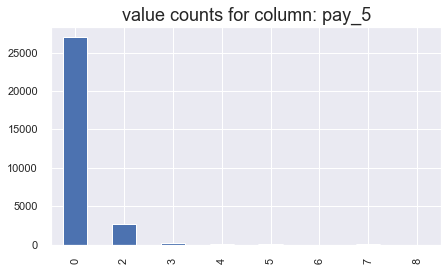

Column pay_6 :
 AxesSubplot(0.125,0.125;0.775x0.755) 




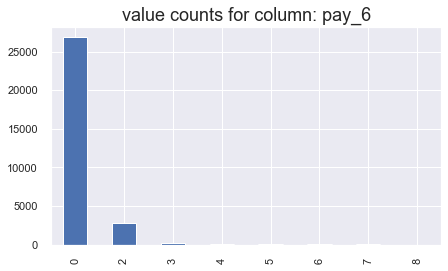

In [617]:
for i in range(1, 7):
    col = 'pay_' + str(i)
    print('Column', col, ':\n', df[col].value_counts().sort_index()\
          .plot(kind='bar', figsize=(7,4)), '\n\n')
    plt.title('value counts for column: {}'.format(col), fontsize=18)
    plt.show()

AxesSubplot(0.125,0.125;0.775x0.755) 




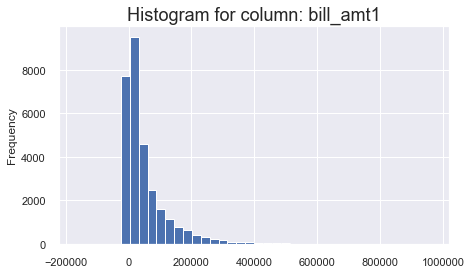

AxesSubplot(0.125,0.125;0.775x0.755) 




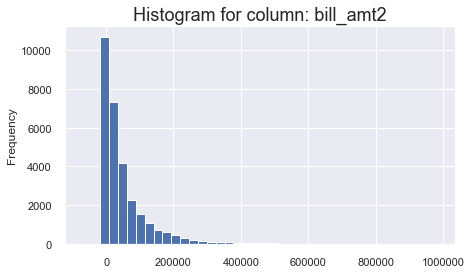

AxesSubplot(0.125,0.125;0.775x0.755) 




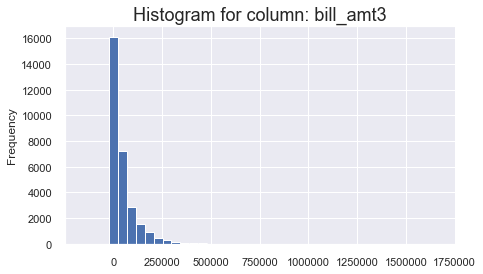

AxesSubplot(0.125,0.125;0.775x0.755) 




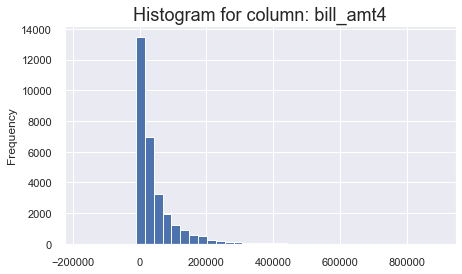

AxesSubplot(0.125,0.125;0.775x0.755) 




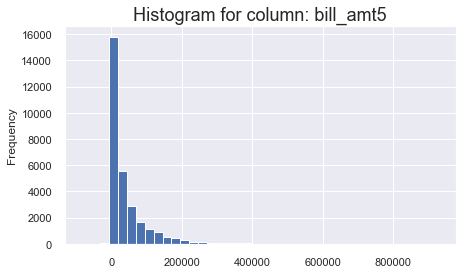

AxesSubplot(0.125,0.125;0.775x0.755) 




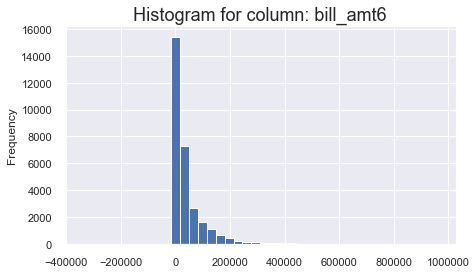

In [618]:
for i in range(1, 7):
    col = 'bill_amt' + str(i)
    print(df[col].plot(kind='hist', figsize=(7,4), bins=40), '\n\n')
    plt.title('Histogram for column: {}'.format(col), fontsize=18)
    plt.show()

Let's check the credit limit distribution VS sex.

Text(0.5, 1.0, 'Limit Balance Box plot by Gender')

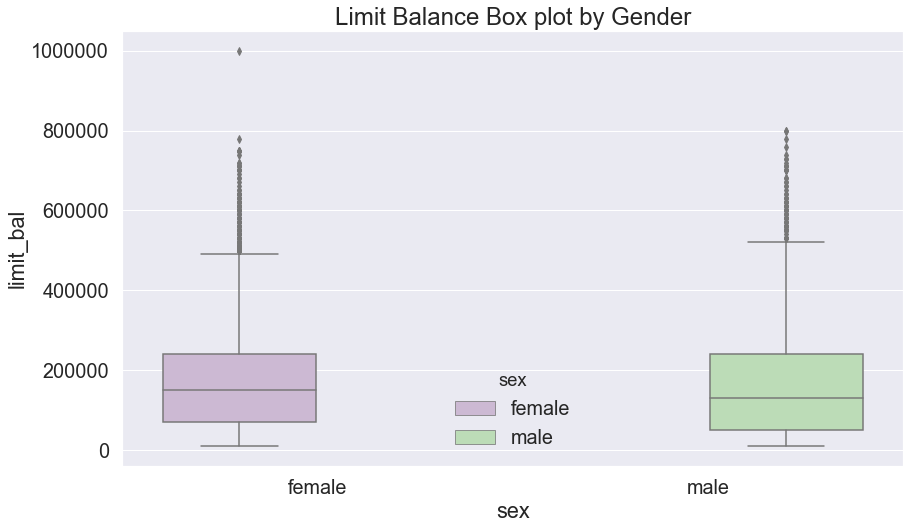

In [812]:
sns.set(font_scale=1.8)

fig, ax1 = plt.subplots(figsize=(14,8))
s = sns.boxplot(ax = ax1, x="sex", y="limit_bal", hue="sex",data=non_dummy_df,\
                palette="PRGn",showfliers=True)
plt.title("Limit Balance Box plot by Gender", fontsize=24)


Text(0.5, 1.0, 'Limit Balance Box plot by Gender & Edcuation')

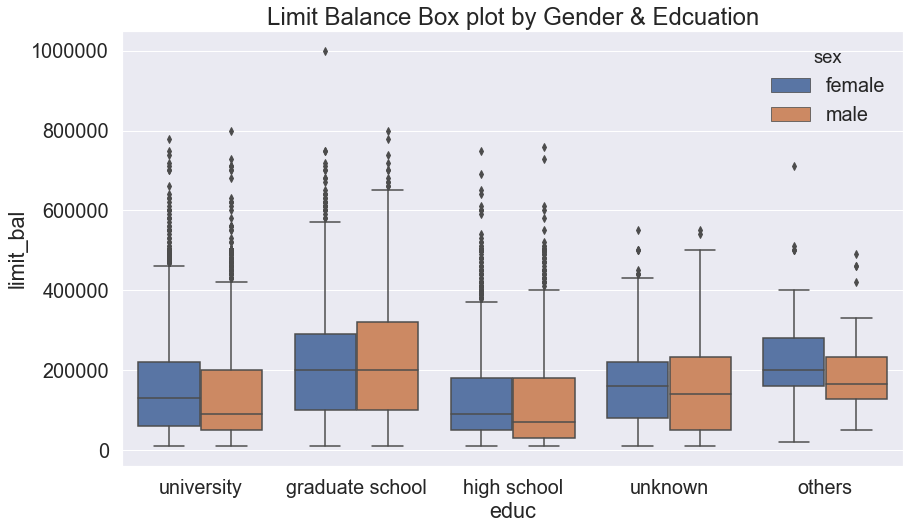

In [1631]:
sns.set(font_scale=1.8)

fig, ax1 = plt.subplots(figsize=(14, 8))
sns.boxplot(x="educ", y="limit_bal", hue='sex', data=df_no_dummies)
plt.title("Limit Balance Box plot by Gender & Edcuation", fontsize=24)


Text(0.5, 1.0, 'Limit Balance Box plot by Status')

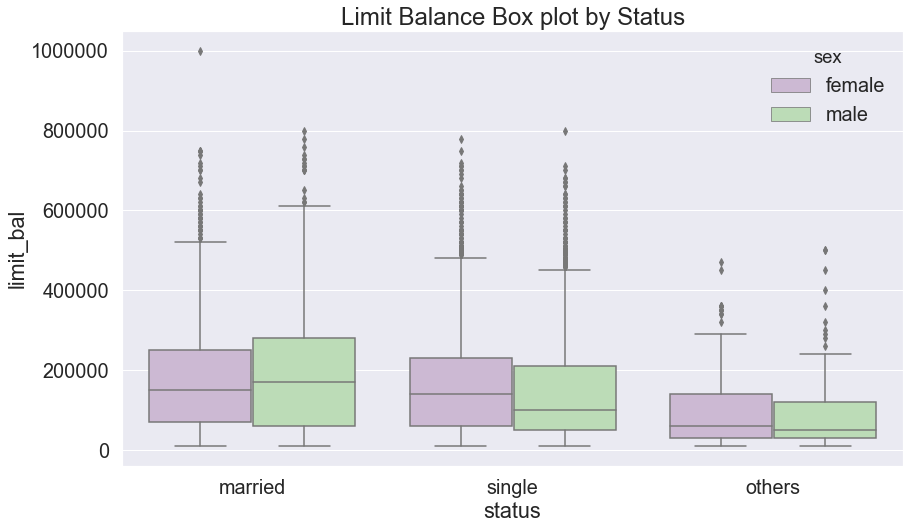

In [815]:
sns.set(font_scale=1.8)

fig, ax1 = plt.subplots(figsize=(14,8))
s = sns.boxplot(ax = ax1, x="status", y="limit_bal", hue="sex",data=non_dummy_df,\
                palette="PRGn",showfliers=True)
plt.title("Limit Balance Box plot by Status", fontsize=24)


Now, let's see how default differs with respect to other features.

Text(0.5, 1.0, 'Default average & confidence intervals by Education level & Gender')

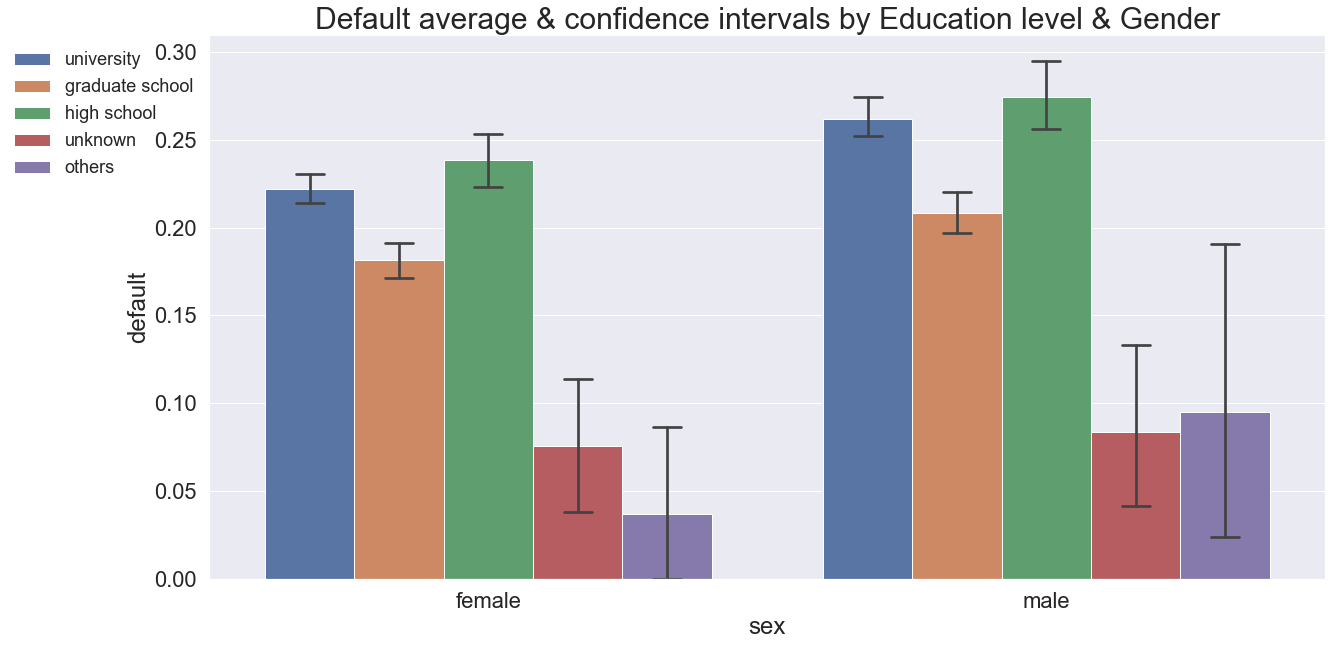

In [838]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=2)
sns.barplot(x="sex", y="default", data=non_dummy_df, hue="educ", capsize=.05)
plt.legend(loc = 'best', bbox_to_anchor=(0, 1), fontsize=18)
plt.title("Default average & confidence intervals by Education level & Gender", fontsize=30)

Text(0.5, 1.0, 'Default average & confidence intervals by Status & Gender')

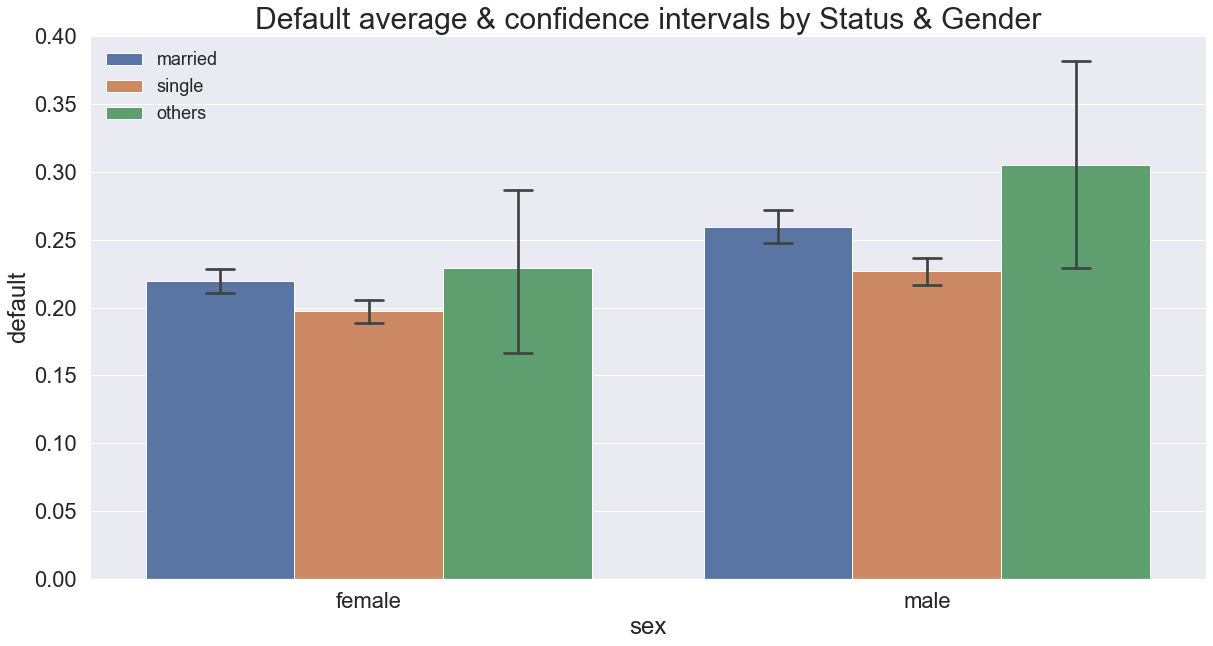

In [842]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=2)
sns.barplot(x="sex", y="default", data=non_dummy_df, hue="status", capsize=.05)
plt.legend(loc = 'upper left', bbox_to_anchor=(0, 1), fontsize=18)
plt.title("Default average & confidence intervals by Status & Gender", fontsize=30)

In [620]:
cols = ['pay_amt' + str(i) for i in range(1,7)]
df[cols].describe()

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000,29932.0000
mean,5659.6030,5923.5015,5226.1588,4830.1801,4805.2693,5221.9064
std,16555.8746,23060.1997,17620.7737,15680.8497,15294.0668,17795.2850
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1000.0000,836.0000,390.0000,298.0000,255.0000,122.0000
50%,2100.0000,2010.0000,1800.0000,1500.0000,1500.0000,1500.0000
75%,5006.0000,5000.0000,4507.2500,4015.0000,4040.2500,4000.0000
max,873552.0000,1684259.0000,896040.0000,621000.0000,426529.0000,528666.0000


Now, let's see a correlation matrix heat map, and try to find interesting relations

Text(0.5, 1, 'Correlation Matrix')

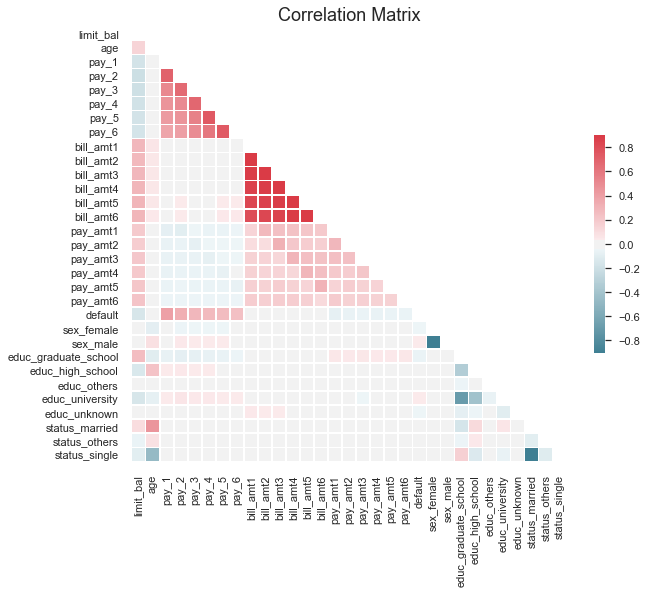

In [621]:
sns.set(style="white")

corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, vmin=-0.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix", fontsize=18)

And now plot correlations to default

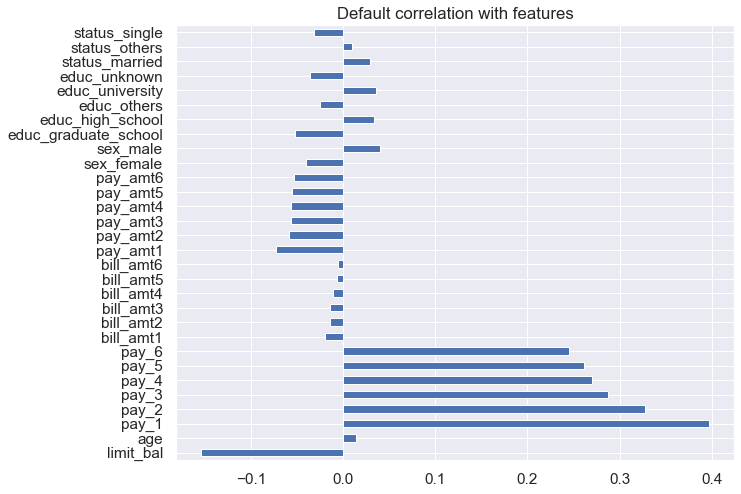

In [1642]:
plt.style.use('seaborn')
sns.set(font_scale=1.4)
plt.figure(figsize=(10,8))
plt.title('Default correlation with features')

df.corr()['default'].drop('default').plot(kind='barh')

It seems that the strongest relationships are regarding repayment status(pay_x) the link is positive, and it seems that the link decreases with the number of months before the current month.
Same goes for the payment amount(pay_amt_x), just with negative and less significant correlations. 
Another notable correlation is with the amount of given credit(limit_bal)

# Preprocessing

Let's scale the x values

Because there are different scales in our data, we'll use standard scalar which is less sensitive to outliers.

In [1536]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df = df.astype(float)
df = df.dropna()
scale = MinMaxScaler()
df_to_scale = df
scaled = scale.fit_transform(df_to_scale)
scaled_df = pd.DataFrame(scaled, columns=df_to_scale.columns)
scaled_df.sample(5)

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,sex_female,sex_male,educ_graduate_school,educ_high_school,educ_others,educ_university,educ_unknown,status_married,status_others,status_single
8134,0.25,0.34,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.07,0.09,0.16,0.08,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
1624,0.04,0.17,0.00,0.00,0.00,0.00,0.25,0.00,0.18,0.10,0.11,0.20,0.12,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
7921,0.16,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.07,0.09,0.17,0.09,0.26,0.00,0.00,0.01,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
5536,0.25,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.22,0.17,0.22,0.08,0.23,0.01,0.00,0.00,0.00,0.01,0.10,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
569,0.19,0.14,0.12,0.00,0.00,0.00,0.00,0.00,0.20,0.07,0.09,0.16,0.10,0.26,0.01,0.00,0.01,0.03,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


### Train and test split

We have about 30k obs', so let's use 80% for train and 20% for test.

In [1565]:
from sklearn.model_selection import train_test_split

test_size = round(0.2 * len(scaled_df))
train, test = train_test_split(scaled_df, test_size=test_size, random_state=0, shuffle=True)

label = 'default'

x_train, y_train = train.drop(label, axis=1), train[label]
x_test, y_test = test.drop(label, axis=1), test[label]

And let's split for NOT scaled data as well.

In [1538]:
train_not_scaled, test_not_scaled = train_test_split(df, test_size=test_size,\
                                                     random_state=0, shuffle=True)

label = 'default'

x_train_not_scaled, y_train_not_scaled = train_not_scaled.drop(label, axis=1), train_not_scaled[label]
x_test_not_scaled, y_test_not_scaled = test_not_scaled.drop(label, axis=1), test_not_scaled[label]

In [1539]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((23946, 30), (23946,), (5986, 30), (5986,))

# Evaluation + Benchmark

As this is a classification problem that is a little unbalanced in its labels, we'll use F1 & accuracy as our evaluation metric.

The benchmark would be the most common label in the train set

In [1540]:
df.default.value_counts(dropna=False)

0.00    23301
1.00     6631
Name: default, dtype: int64

In [1541]:
y_train.value_counts(dropna=False)

0.00    18633
1.00     5313
Name: default, dtype: int64

In this case it's 0 (not survived), let's check its performance on both train and test

In [1542]:
y_test.value_counts(dropna=False)

0.00    4668
1.00    1318
Name: default, dtype: int64

In [1543]:
acc = len(df[df.default==0])/len(df)
pred = np.zeros(len(df))
f1 = sk.metrics.f1_score(df.default, pred)
print('Beanchmark Accuracy:', acc)
print('Beanchmark F1:', f1) # it'll be 0..

Beanchmark Accuracy: 0.7784645195777095
Beanchmark F1: 0.0


The performance on train and test is almost equal, our best algorithm should beat this performance!

# Running KNN - on NOT scaled data

In [1643]:
from sklearn.neighbors import KNeighborsClassifier

train_acc = []
test_acc = []

train_f1 = []
test_f1 = []

k_vals = list(range(5, 41, 5))

vals = k_vals

for k in vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_not_scaled, y_train_not_scaled)
    
    train_acc.append(knn.score(x_train_not_scaled, y_train_not_scaled))
    test_acc.append(knn.score(x_test_not_scaled, y_test_not_scaled))
    
    y_pred_train = knn.predict(x_train_not_scaled)
    y_pred_test = knn.predict(x_test_not_scaled)

    train_f1.append(sk.metrics.f1_score(y_train, y_pred_train))
    test_f1.append(sk.metrics.f1_score(y_test, y_pred_test))


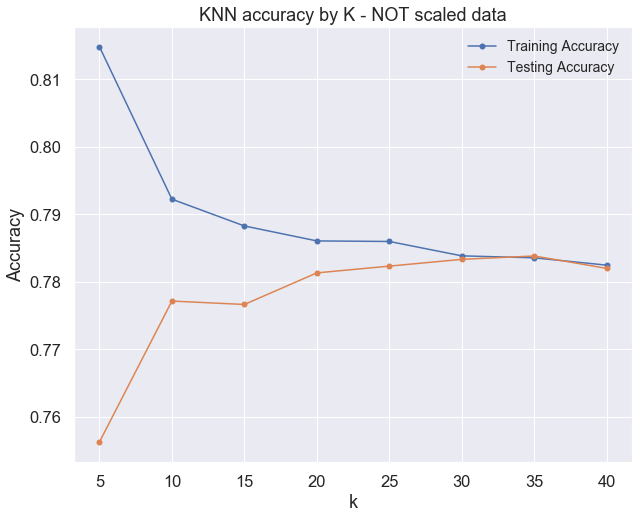

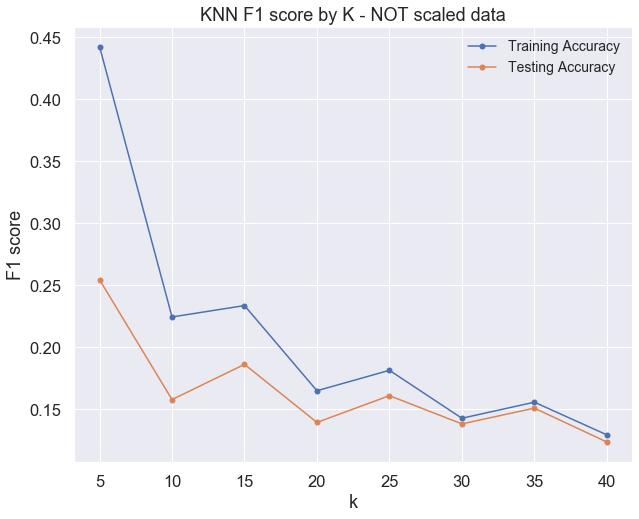

In [1644]:
sns.set(font_scale=1.5)
# This will plot the accuracies as a function of k.

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot()
ax1.plot(vals, train_acc, '-o', label='Training Accuracy')
ax1.plot(vals ,test_acc, '-o', label='Testing Accuracy')
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("k")
plt.title('KNN accuracy by K - NOT scaled data')
plt.legend(fontsize=14)
plt.show()

# This will plot the f1 score as a function of k.

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot()
ax1.plot(vals, train_f1, '-o', label='Training Accuracy')
ax1.plot(vals ,test_f1, '-o', label='Testing Accuracy')
ax1.set_ylabel("F1 score")
ax1.set_xlabel("k")
plt.title('KNN F1 score by K - NOT scaled data')
plt.legend(fontsize=14)
plt.show()

It doesn't seem better than the benchmark even when when it's performing best on the test set(k = 30). Also, we know that KNN can highly suffer from features that are in different scales. So let's run it on scaled data

In [1647]:
k = 30
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train_not_scaled, y_train_not_scaled)
y_pred_test = knn.predict(x_test_not_scaled)
pred_df = pd.DataFrame({'KNN_not_scaled': y_pred_test})
pred_df['Beanchmark'] = 0

# KNN - on SCALED data

In [1547]:
from sklearn.neighbors import KNeighborsClassifier

train_acc = []
test_acc = []

train_f1 = []
test_f1 = []

k_vals = list(range(5, 41, 5))
vals = k_vals

for k in vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    test_acc.append(knn.score(x_test, y_test))
    train_acc.append(knn.score(x_train, y_train))
    
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)

    train_f1.append(sk.metrics.f1_score(y_train, y_pred_train))
    test_f1.append(sk.metrics.f1_score(y_test, y_pred_test))


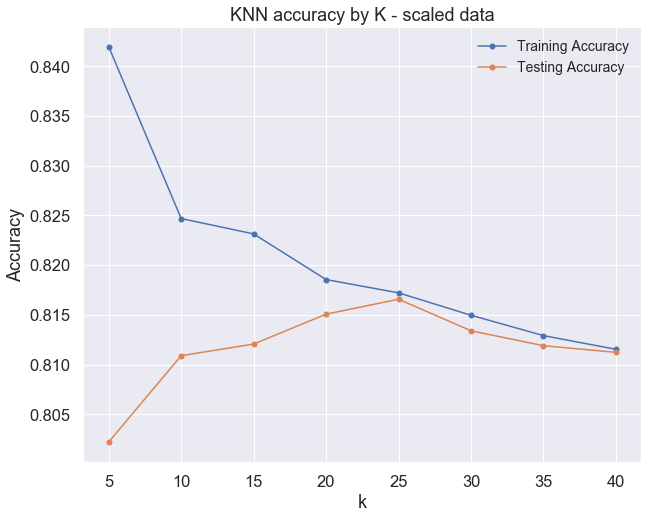

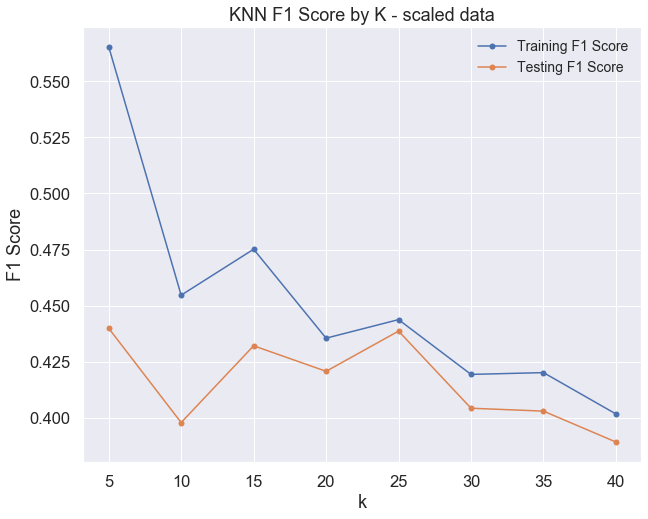

In [1554]:

# This will plot the accuracies as a function of k.

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot()
ax1.plot(vals, train_acc, '-o', label='Training Accuracy')
ax1.plot(vals ,test_acc, '-o', label='Testing Accuracy')
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("k")
plt.title('KNN accuracy by K - scaled data')
plt.legend(fontsize=14)
plt.show()


# This will plot the f1 score as a function of k.

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot()
ax1.plot(vals, train_f1, '-o', label='Training F1 Score')
ax1.plot(vals ,test_f1, '-o', label='Testing F1 Score')
ax1.set_ylabel("F1 Score")
ax1.set_xlabel("k")
plt.title('KNN F1 Score by K - scaled data')
plt.legend(fontsize=14)
plt.show()

The accuracy improved. and the F1 score improved by a lot. Based on this graphs we'll choose k = 25.

In [1648]:
k = 25
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train_not_scaled, y_train_not_scaled)
y_pred_test = knn.predict(x_test_not_scaled)
pred_df['KNN_scaled'] = y_pred_test

# Decision Tree

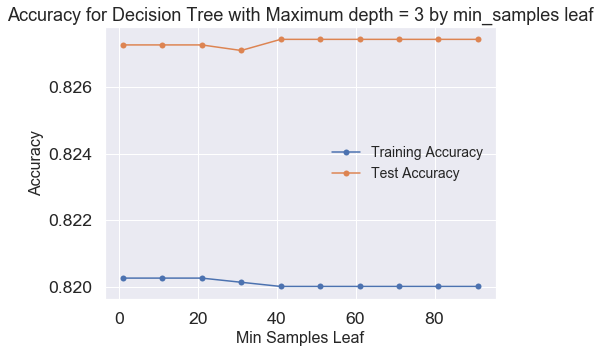

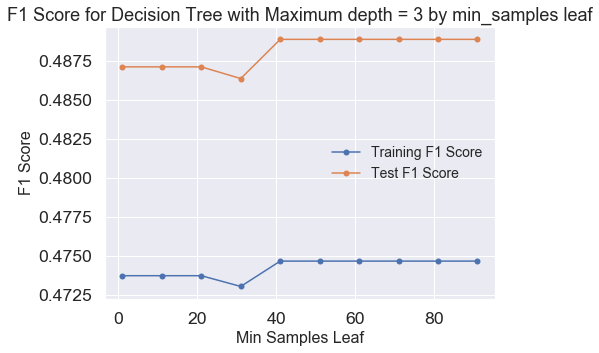

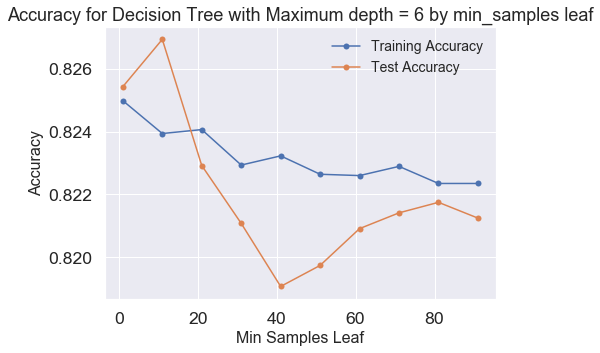

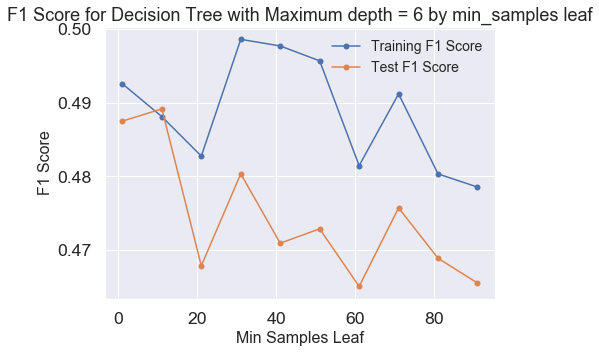

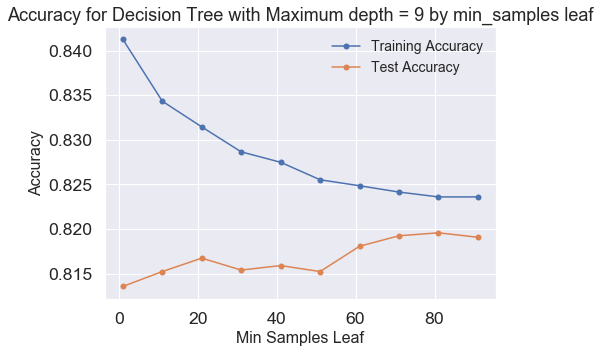

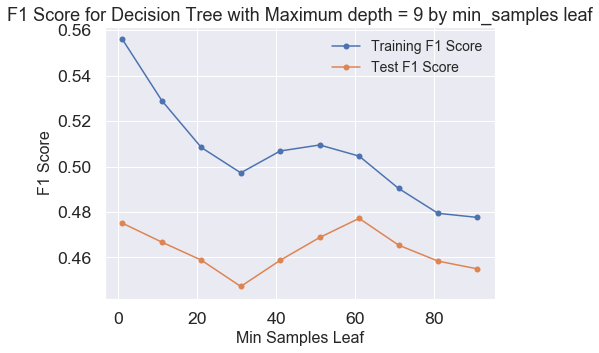

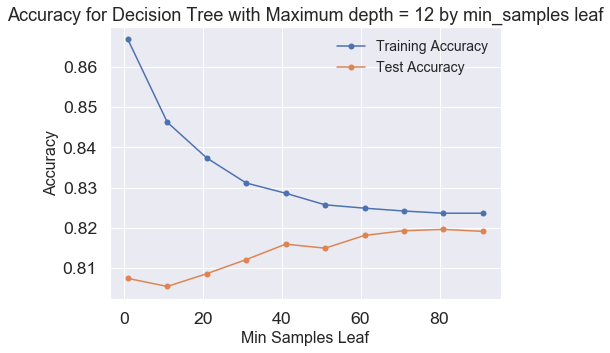

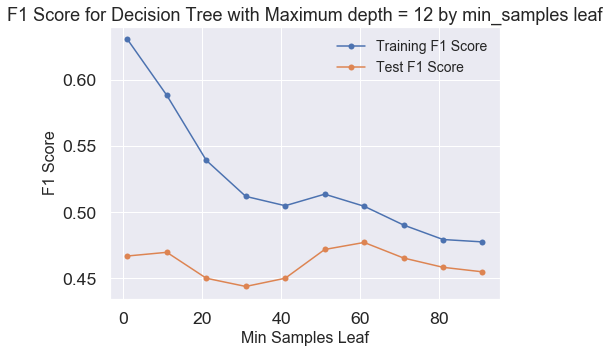

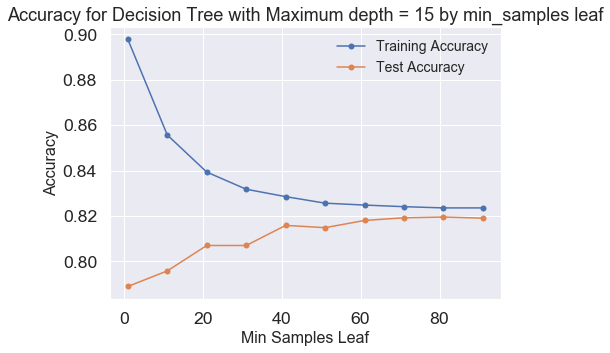

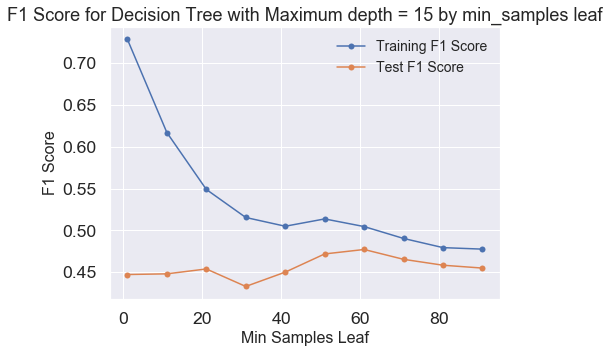

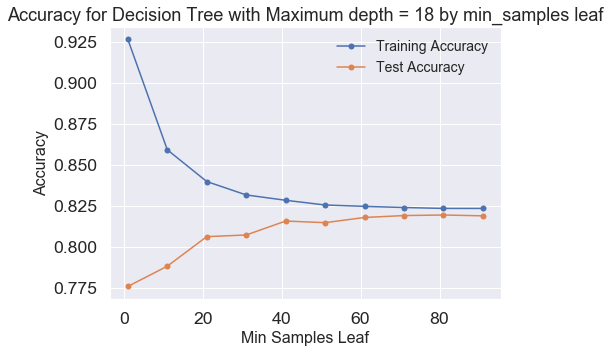

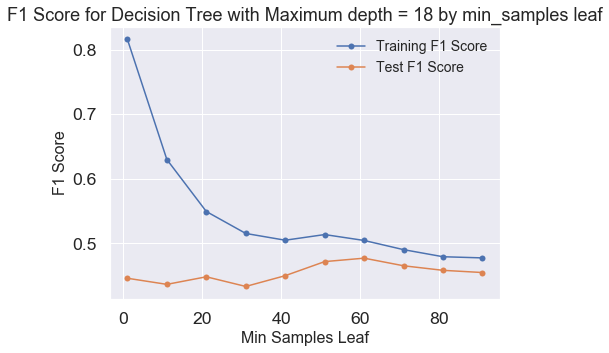

In [1194]:
from sklearn.tree import DecisionTreeClassifier

max_depth_vals = range(3, 19, 3)

min_samples_vals = range(1, 101, 10)

for depth in max_depth_vals:
    
    train_acc = []
    test_acc = []
    
    train_f1 = []
    test_f1 = []
    
    for min_sample in min_samples_vals:
        classifier = DecisionTreeClassifier(random_state=0, \
                                            max_depth=depth, min_samples_leaf=min_sample)
        classifier.fit(x_train_not_scaled, y_train_not_scaled)
        
        train_acc.append(classifier.score(x_train_not_scaled, y_train_not_scaled))
        test_acc.append(classifier.score(x_test_not_scaled, y_test_not_scaled))
        
        y_pred_train = classifier.predict(x_train_not_scaled)
        y_pred_test = classifier.predict(x_test_not_scaled)

        train_f1.append(sk.metrics.f1_score(y_train, y_pred_train))
        test_f1.append(sk.metrics.f1_score(y_test, y_pred_test))

    # This will plot the Accuracy Scores as a function of k.
  
    fig, ax = plt.subplots(figsize=(7, 5))
    plt.plot(min_samples_vals, train_acc, '-o', label = 'Training Accuracy')
    plt.plot(min_samples_vals, test_acc, '-o', label = 'Test Accuracy')
    ax.set_xlabel('Min Samples Leaf', fontsize=16)
    ax.set_ylabel('Accuracy', fontsize=16)
    plt.title('Accuracy for Decision Tree with Maximum depth = {} by min_samples leaf'.format(depth)\
              , fontsize=18)
    plt.legend(fontsize=14)
    plt.show()
    print('\n')

    # This will plot the F1 Scores as a function of k.

    fig = plt.figure(figsize=(7, 5))
    ax1 = fig.add_subplot()
    ax1.plot(min_samples_vals, train_f1, '-o', label = 'Training F1 Score')
    ax1.plot(min_samples_vals, test_f1, '-o', label = 'Test F1 Score')
    ax1.set_ylabel("F1 Score", fontsize=16)
    ax1.set_xlabel('Min Samples Leaf', fontsize=16)
    plt.title('F1 Score for Decision Tree with Maximum depth = {} by min_samples leaf'.format(depth)\
              , fontsize=18)
    plt.legend(fontsize=14)
    plt.show()
    print('\n\n\n\n')


Based on this graphs we decided to go with min_samples_leaf=60 and max_tree_depth=15

In [1649]:
max_depth = 15
min_samples_leaf = 60
classifier = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
classifier.fit(x_train_not_scaled, y_train_not_scaled)
y_pred_test = classifier.predict(x_test_not_scaled)
pred_df['Decision_tree'] = y_pred_test

# Let's plot the Decision Tree

We plot will plot this with max_depth = 6 just so we'll be able to keep track on the tree.

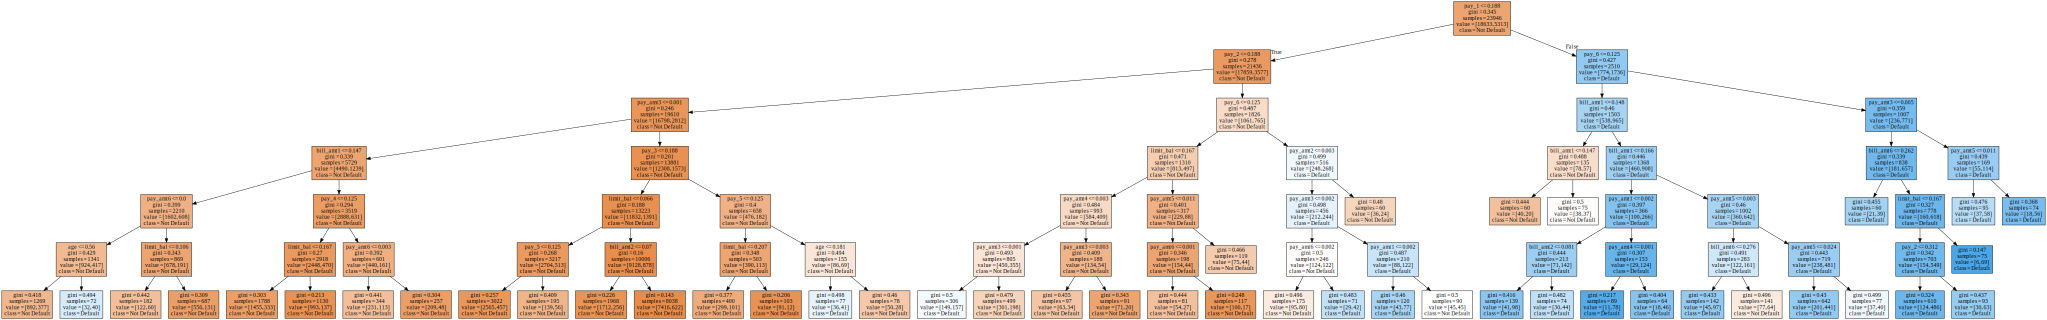

In [1122]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source


def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=60, random_state=0)
tree.fit(x_train, y_train)
plot_tree(tree, features=x_train.columns, labels=['Not Default', 'Default'])

# Random Forest

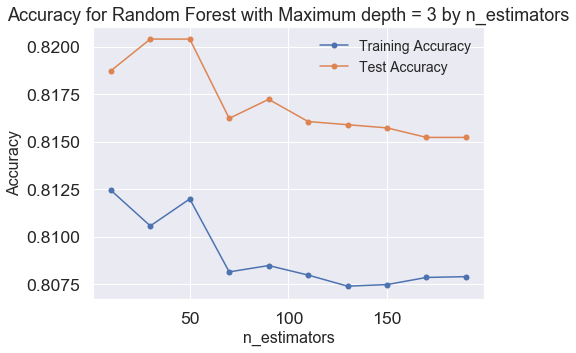

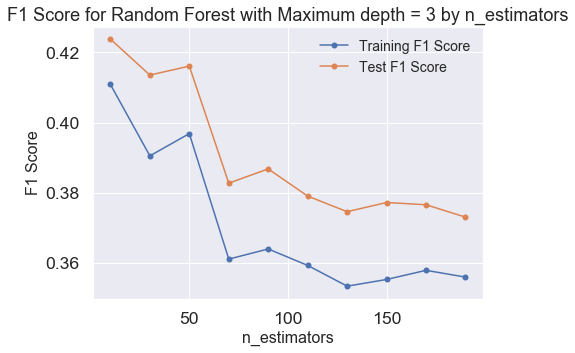

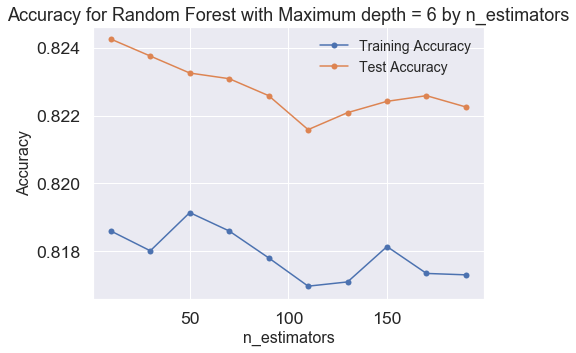

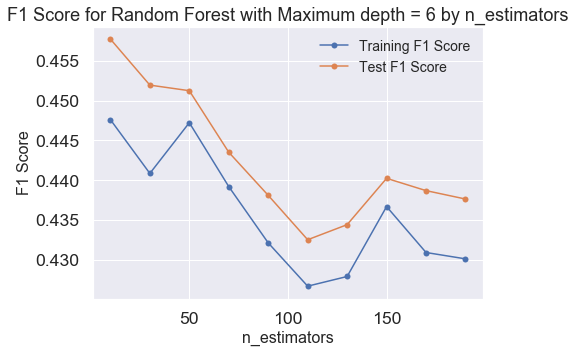

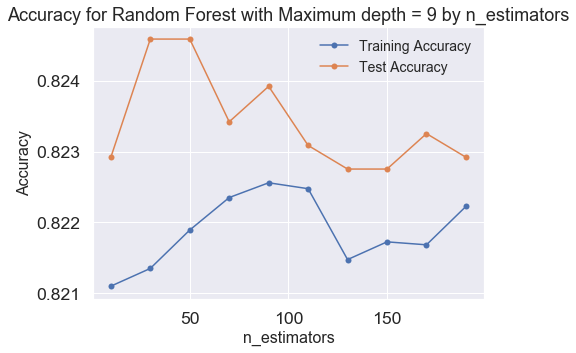

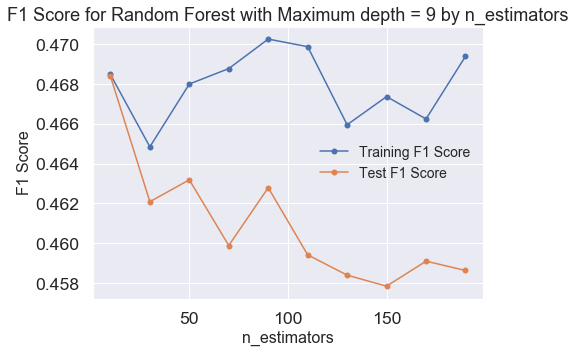

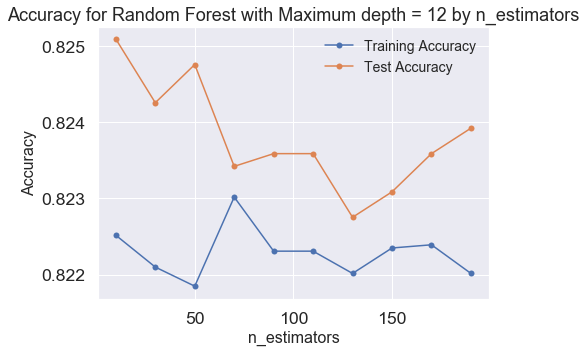

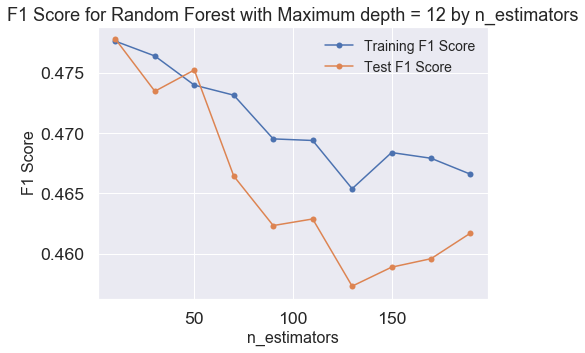

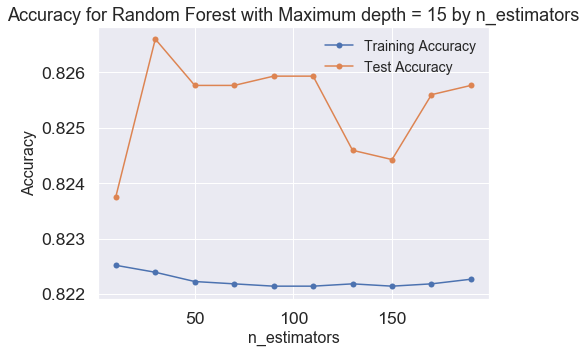

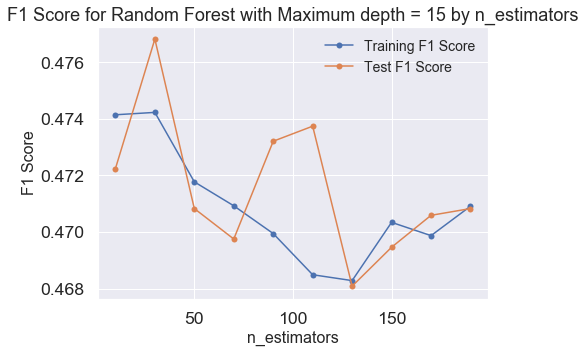

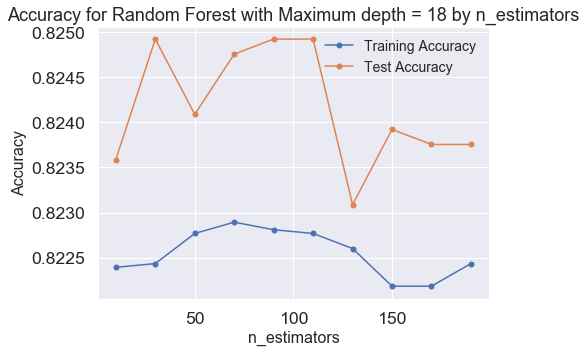

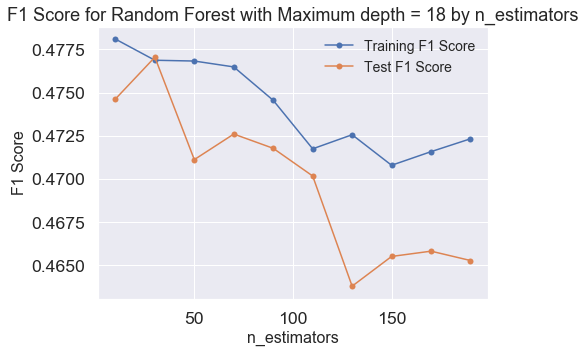

In [1250]:
from sklearn.ensemble import RandomForestClassifier

max_depth_vals = range(3, 19, 3)

n_estimators_values = range(10, 200, 20)

for depth in max_depth_vals:
    
    train_acc = []
    test_acc = []
    
    train_f1 = []
    test_f1 = []
    
    for n in n_estimators_values:
        classifier = RandomForestClassifier(random_state=0, n_estimators=n, \
                                        max_depth=depth, min_samples_leaf=60) 
                                    # The paramters we decided on earlier
        classifier.fit(x_train_not_scaled, y_train_not_scaled)
        
        train_acc.append(classifier.score(x_train_not_scaled, y_train_not_scaled))
        test_acc.append(classifier.score(x_test_not_scaled, y_test_not_scaled))
        
        y_pred_train = classifier.predict(x_train_not_scaled)
        y_pred_test = classifier.predict(x_test_not_scaled)

        train_f1.append(sk.metrics.f1_score(y_train, y_pred_train))
        test_f1.append(sk.metrics.f1_score(y_test, y_pred_test))

    # This will plot the Accuracy Scores as a function of k.

    fig, ax = plt.subplots(figsize=(7, 5))
    plt.plot(n_estimators_values, train_acc, '-o', label = 'Training Accuracy')
    plt.plot(n_estimators_values, test_acc, '-o', label = 'Test Accuracy')
    ax.set_xlabel('n_estimators', fontsize=16)
    ax.set_ylabel('Accuracy', fontsize=16)
    plt.title('Accuracy for Random Forest with Maximum depth = {} by n_estimators'.format(depth)\
              , fontsize=18)
    plt.legend(fontsize=14)
    plt.show()
    print('\n')

    # This will plot the F1 Scores as a function of k.

    fig = plt.figure(figsize=(7, 5))
    ax1 = fig.add_subplot()
    ax1.plot(n_estimators_values, train_f1, '-o', label = 'Training F1 Score')
    ax1.plot(n_estimators_values, test_f1, '-o', label = 'Test F1 Score')
    ax1.set_ylabel("F1 Score", fontsize=16)
    ax1.set_xlabel('n_estimators', fontsize=16)
    plt.title('F1 Score for Random Forest with Maximum depth = {} by n_estimators'.format(depth)\
              , fontsize=18)
    plt.legend(fontsize=14)
    plt.show()
    print('\n\n\n\n')


We can notice that the y axes has really small differences both on F1 and Accuracy(diff<1%).
It seems that 100 is the best number of trees. Let's see what is the feature importance:

In [1650]:
n_of_trees = 100
classifier = RandomForestClassifier(random_state=0, n_estimators=n_of_trees, \
                                        max_depth=15, min_samples_leaf=60) 
                                    # The paramters we decided on earlier
classifier.fit(x_train_not_scaled, y_train_not_scaled)
pred_df['random_forest_pred'] = classifier.predict(x_test_not_scaled)

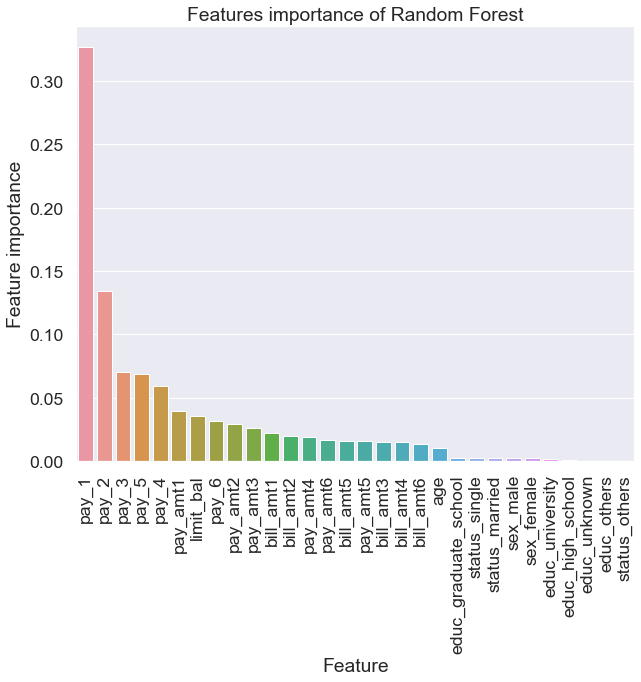

In [1558]:
sns.set(font_scale=1.6)

tmp = pd.DataFrame({'Feature': x_train.columns, 'Feature importance': classifier.feature_importances_})
tmp = tmp.sort_values(by='Feature importance', ascending=False)

plt.figure(figsize = (10, 8))
plt.title('Features importance of Random Forest')
s = sns.barplot(x='Feature', y='Feature importance', data=tmp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()   

# AdaBoost

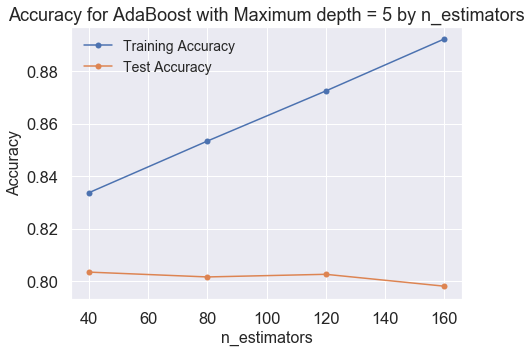

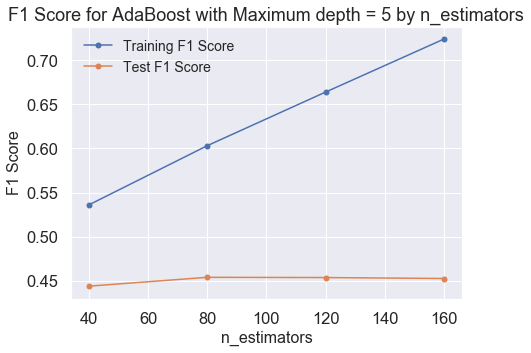

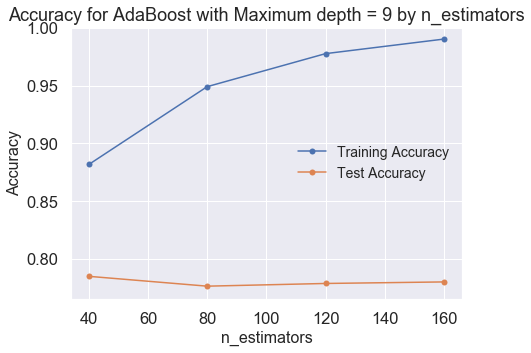

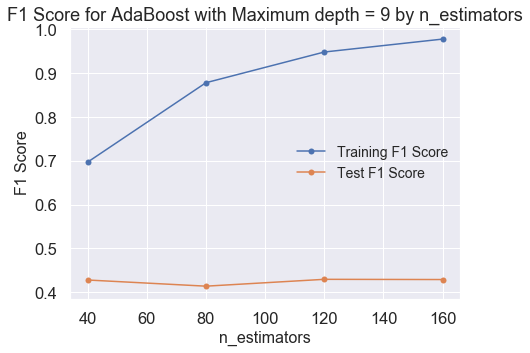

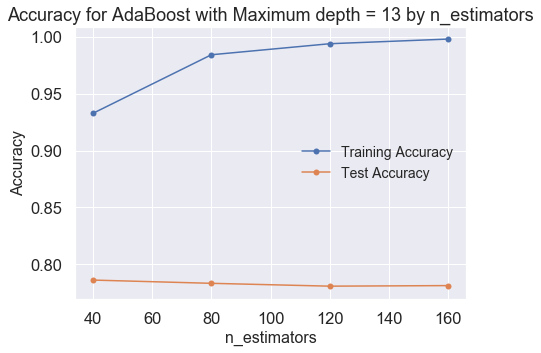

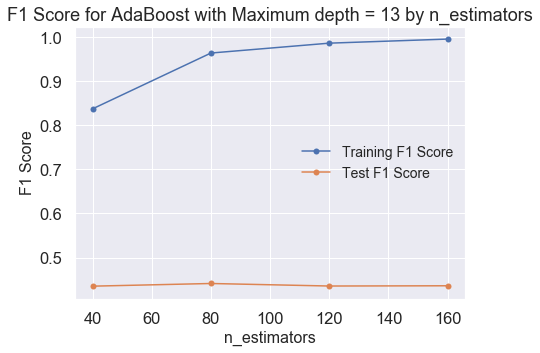

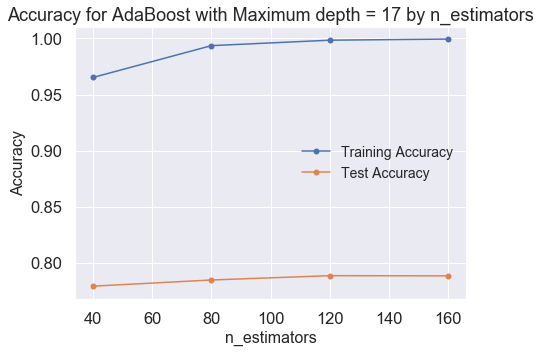

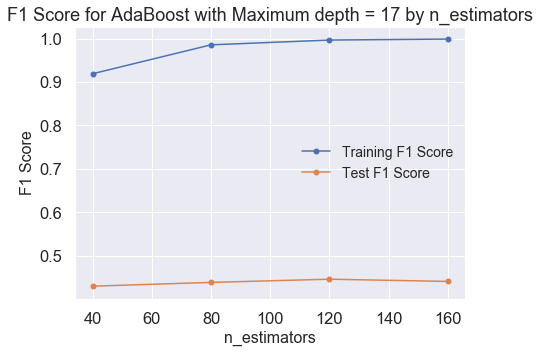

In [1534]:
from sklearn.ensemble import AdaBoostClassifier

max_depth_vals = range(5, 18, 4)

n_estimators_values = range(40, 161, 40)

for depth in max_depth_vals:
    
    train_acc = []
    test_acc = []
    
    train_f1 = []
    test_f1 = []
    
    for n in n_estimators_values:
        base_estimator = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=120)
                                        # AdaBoost tends to oferfit, so we'll use more suited paramters.
        classifier = AdaBoostClassifier(random_state=0, n_estimators=n, \
                                        base_estimator=base_estimator)
        classifier.fit(x_train_not_scaled, y_train_not_scaled)
        
        train_acc.append(classifier.score(x_train_not_scaled, y_train_not_scaled))
        test_acc.append(classifier.score(x_test_not_scaled, y_test_not_scaled))
        
        y_pred_train = classifier.predict(x_train_not_scaled)
        y_pred_test = classifier.predict(x_test_not_scaled)

        train_f1.append(sk.metrics.f1_score(y_train, y_pred_train))
        test_f1.append(sk.metrics.f1_score(y_test, y_pred_test))

    # This will plot the Accuracy Scores as a function of k.

    fig, ax = plt.subplots(figsize=(7, 5))
    plt.plot(n_estimators_values, train_acc, '-o', label = 'Training Accuracy')
    plt.plot(n_estimators_values, test_acc, '-o', label = 'Test Accuracy')
    ax.set_xlabel('n_estimators', fontsize=16)
    ax.set_ylabel('Accuracy', fontsize=16)
    plt.title('Accuracy for AdaBoost with Maximum depth = {} by n_estimators'.format(depth)\
              , fontsize=18)
    plt.legend(fontsize=14)
    plt.show()
    print('\n')

    # This will plot the F1 Scores as a function of k.

    fig = plt.figure(figsize=(7, 5))
    ax1 = fig.add_subplot()
    ax1.plot(n_estimators_values, train_f1, '-o', label = 'Training F1 Score')
    ax1.plot(n_estimators_values, test_f1, '-o', label = 'Test F1 Score')
    ax1.set_ylabel("F1 Score", fontsize=16)
    ax1.set_xlabel('n_estimators', fontsize=16)
    plt.title('F1 Score for AdaBoost with Maximum depth = {} by n_estimators'.format(depth)\
              , fontsize=18)
    plt.legend(fontsize=14)
    plt.show()
    print('\n\n\n\n')


We can notice that there is a major overfitting. We can also notice that the y axes has really small differences both on F1 and Accuracy(usually diff<1%).
It seems that 40 is the best number of trees and max_depth = 5 is the best max_depth. Let's see what is the feature importance:

In [1651]:
n_of_trees = 40
base_estimator = DecisionTreeClassifier(max_depth=15, min_samples_leaf=60)
                                # The paramters we decided on earlier
classifier = AdaBoostClassifier(random_state=0, n_estimators=n_of_trees, base_estimator=base_estimator)
classifier.fit(x_train_not_scaled, y_train_not_scaled)
pred_df['AdaBoost'] = classifier.predict(x_test_not_scaled)

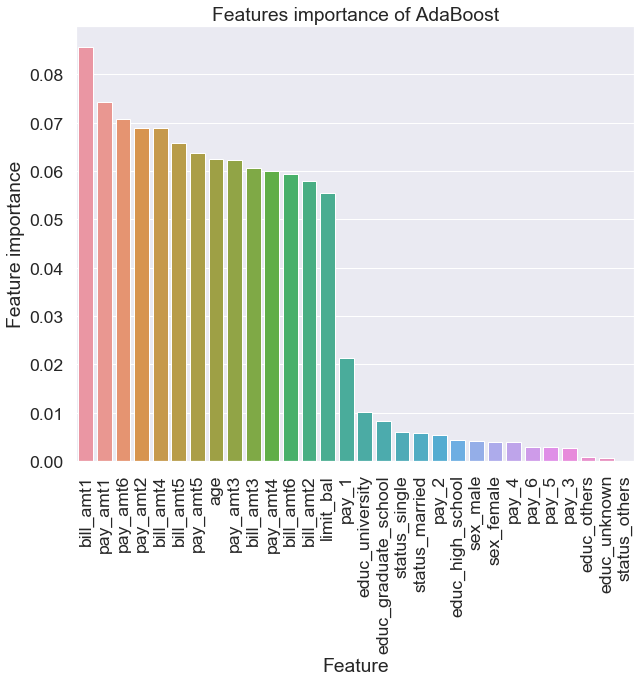

In [1595]:
sns.set(font_scale=1.6)

tmp = pd.DataFrame({'Feature': x_train.columns, 'Feature importance': classifier.feature_importances_})
tmp = tmp.sort_values(by='Feature importance', ascending=False)

plt.figure(figsize = (10, 8))
plt.title('Features importance of AdaBoost')
s = sns.barplot(x='Feature', y='Feature importance', data=tmp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()   

# Logistic regression

In [1652]:
classifier = LogisticRegression(penalty='l1', solver='liblinear')
classifier.fit(x_train, y_train)

y_pred_test = classifier.predict(x_test)
y_pred_train = classifier.predict(x_train)

acc_train = classifier.score(x_train, y_train)
acc_test = classifier.score(x_test, y_test)

f1_train = sk.metrics.f1_score(y_train, y_pred_train)
f1_test = sk.metrics.f1_score(y_test, y_pred_test)


pred_df['logistic_regression'] = y_pred_test

print('Accuracy for train:', acc_train)
print('F1 Score for train:', f1_train, '\n')

print('Accuracy for test:', acc_test)
print('F1 Score for test:', f1_test)

Accuracy for train: 0.8170049277541134
F1 Score for train: 0.4433434959349593 

Accuracy for test: 0.824423655195456
F1 Score for test: 0.46459500764136524


# Neural Networks with pyTorch

In [1563]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [1573]:
x_train.shape

(23946, 30)

In [1654]:
## train data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(x_train.values), 
                       torch.FloatTensor(y_train))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(x_test.values))

In [1655]:
BATCH_SIZE = 64
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [1656]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(30, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [1657]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [1658]:
LEARNING_RATE = 0.001
model = binaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

binaryClassification(
  (layer_1): Linear(in_features=30, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [1659]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [1660]:
EPOCHS = 50
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} |\
    Acc: {epoch_acc/len(train_loader):.3f}')


Epoch 001: | Loss: 0.51317 |    Acc: 77.989
Epoch 002: | Loss: 0.45127 |    Acc: 81.323
Epoch 003: | Loss: 0.44594 |    Acc: 81.307
Epoch 004: | Loss: 0.44482 |    Acc: 81.408
Epoch 005: | Loss: 0.44297 |    Acc: 81.603
Epoch 006: | Loss: 0.44206 |    Acc: 81.341
Epoch 007: | Loss: 0.43898 |    Acc: 81.765
Epoch 008: | Loss: 0.43700 |    Acc: 81.683
Epoch 009: | Loss: 0.43653 |    Acc: 81.816
Epoch 010: | Loss: 0.43596 |    Acc: 81.848
Epoch 011: | Loss: 0.43344 |    Acc: 81.987
Epoch 012: | Loss: 0.43267 |    Acc: 81.957
Epoch 013: | Loss: 0.43335 |    Acc: 81.912
Epoch 014: | Loss: 0.43282 |    Acc: 81.987
Epoch 015: | Loss: 0.43357 |    Acc: 81.976
Epoch 016: | Loss: 0.43065 |    Acc: 81.976
Epoch 017: | Loss: 0.43037 |    Acc: 82.157
Epoch 018: | Loss: 0.43093 |    Acc: 81.941
Epoch 019: | Loss: 0.43039 |    Acc: 82.053
Epoch 020: | Loss: 0.42827 |    Acc: 82.037
Epoch 021: | Loss: 0.42820 |    Acc: 82.000
Epoch 022: | Loss: 0.42897 |    Acc: 82.045
Epoch 023: | Loss: 0.42904 |    

In [1661]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
pred_df['NN'] = y_pred_list

In [1585]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_list)

array([[4455,  213],
       [ 836,  482]])

In [1586]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4668
         1.0       0.69      0.37      0.48      1318

    accuracy                           0.82      5986
   macro avg       0.77      0.66      0.69      5986
weighted avg       0.81      0.82      0.80      5986



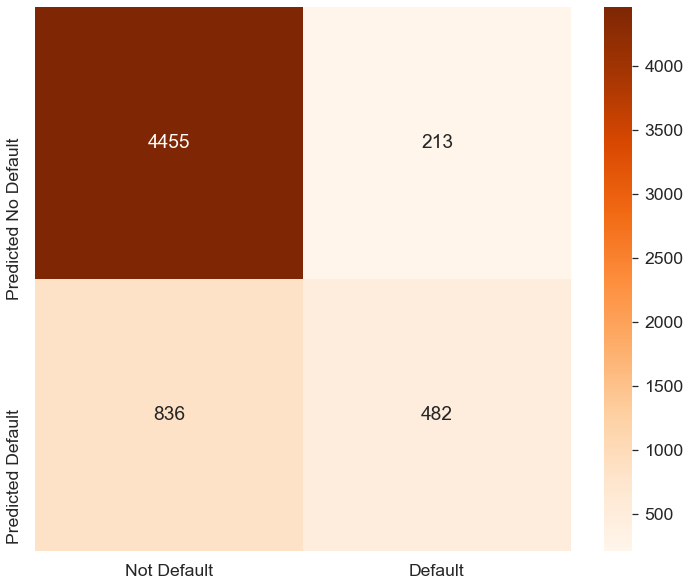

In [1587]:
from string import ascii_uppercase
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 10))
confm = confusion_matrix(y_test, y_pred_list)
df_cm = DataFrame(confm, index=['Predicted No Default', 'Predicted Default'], columns=['Not Default', 'Default'])

ax = sns.heatmap(df_cm, cmap='Oranges', annot=True, fmt='g')

# Averaging models

In [1662]:
pred_df['default'] = test.default.reset_index(drop=True)
p = pred_df
pred_df.head()

,KNN_not_scaled,Beanchmark,KNN_scaled,Decision_tree,random_forest_pred,AdaBoost,logistic_regression,NN,default
0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [1665]:
pred_df = p
pred_df['model_avg'] = pred_df[['random_forest_pred', 'AdaBoost', 'NN']].mean(axis=1).round(decimals=0)


In [1666]:
acc = []
f1 = []
models = pred_df.drop('default', axis=1).columns

for model in models:
    acc.append(sk.metrics.accuracy_score(pred_df.default, pred_df[model]))
    f1.append(sk.metrics.f1_score(pred_df.default, pred_df[model]))

comparison = pd.DataFrame({'Model': models, 'Accuracy': acc, 'F1 Score': f1})
comparison

,Model,Accuracy,F1 Score
0,KNN_not_scaled,0.78,0.14
1,Beanchmark,0.78,0.00
2,KNN_scaled,0.78,0.16
3,Decision_tree,0.82,0.47
4,random_forest_pred,0.82,0.47
5,AdaBoost,0.78,0.45
6,logistic_regression,0.82,0.46
7,NN,0.82,0.47
8,model_avg,0.83,0.47


In [1599]:
acc = []
f1 = []
models = pred_df.drop('default', axis=1).columns

for model in models:
    acc.append(sk.metrics.accuracy_score(pred_df.default, pred_df[model]))
    f1.append(sk.metrics.f1_score(pred_df.default, pred_df[model]))

comparison = pd.DataFrame({'Model': models, 'Accuracy': acc, 'F1 Score': f1})
comparison

,Model,Accuracy,F1 Score
0,KNN_not_scaled,0.78,0.14
1,Beanchmark,0.78,0.00
2,KNN_scaled,0.78,0.16
3,Decision_tree,0.82,0.47
4,random_forest_pred,0.82,0.47
5,AdaBoost,0.78,0.45
6,logistic_regression,0.82,0.46
7,NN,0.82,0.48
8,model_avg,0.83,0.48


Text(0.5, 1.0, 'Accuracy Comparison by Model')

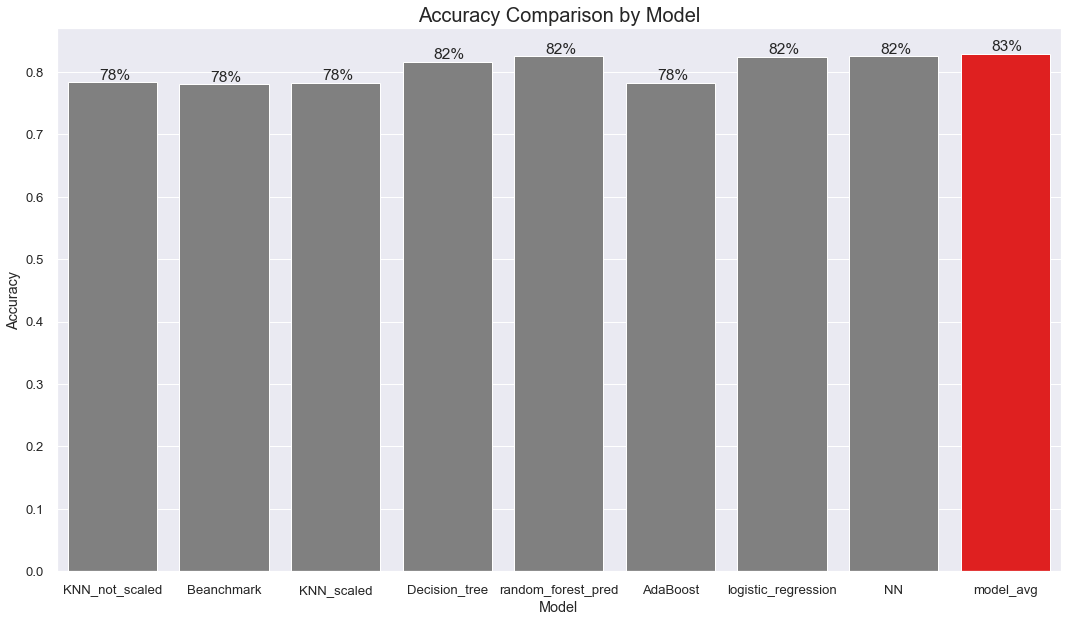

In [1624]:
fig, ax = plt.subplots(figsize=(18,10))
sns.set(font_scale=1.3)

values = comparison.Accuracy.values
clrs = ['grey' if (x < max(values)) else 'red' for x in values ]

graph = sns.barplot(x="Model", y="Accuracy", data=comparison, palette= clrs)

for p in graph.patches:
        graph.annotate('{:.0f}%'.format(p.get_height()*100), (p.get_x()+0.42, p.get_height()),
                    ha='center', va='bottom')
plt.title("Accuracy Comparison by Model", fontsize=20)

Text(0.5, 1.0, 'F1 Score Comparison by Model')

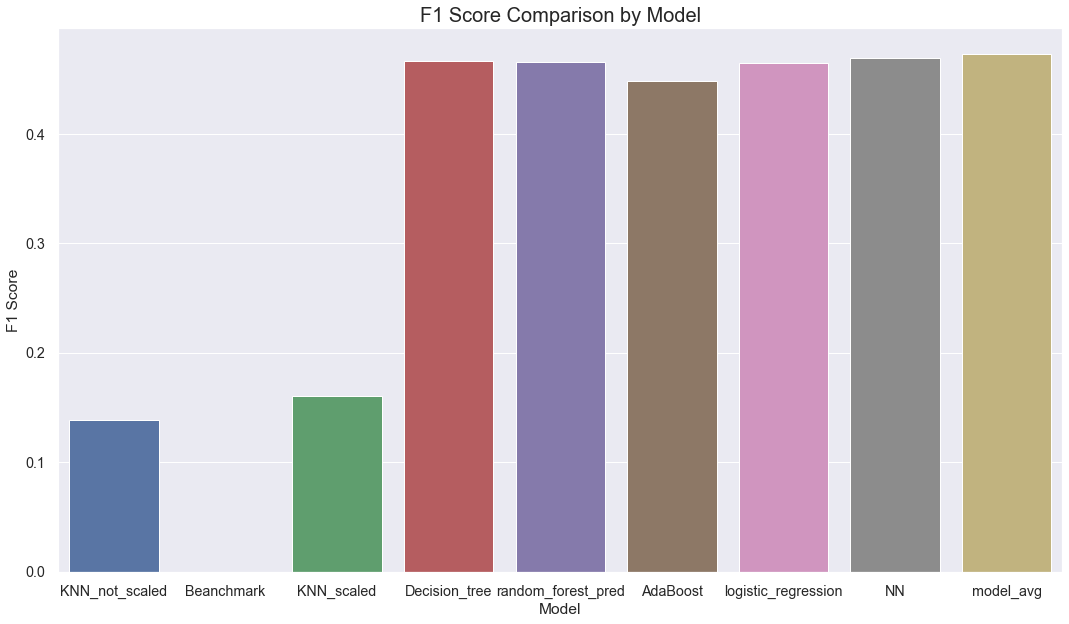

In [1670]:
fig, ax = plt.subplots(figsize=(18,10))
sns.set(font_scale=1.2)
sns.barplot(x="Model", y="F1 Score", data=comparison, capsize=.05)
plt.title("F1 Score Comparison by Model", fontsize=20)

# Performance vs. amount of data

In [1593]:
train_acc = []
test_acc = []

train_f1 = []
test_f1 = []

percents = [0.1, 0.3, 0.5, 0.7, 1]

x_train_not_scaled = x_train_not_scaled.reset_index(drop=True)
y_train_not_scaled = y_train_not_scaled.reset_index(drop=True)

for p in percents:
    x_train_to_use = x_train_not_scaled.iloc[: int(p * len(x_train_not_scaled))]
    y_train_to_use = y_train_not_scaled.iloc[: int(p * len(y_train_not_scaled))]

    n_of_trees = 100
    classifier = RandomForestClassifier(random_state=0, n_estimators=n_of_trees, \
                                            max_depth=15, min_samples_leaf=60) 
                                        # The paramters we decided on earlier
    classifier.fit(x_train_to_use, y_train_to_use)
    
    test_acc.append(classifier.score(x_test_not_scaled, y_test_not_scaled))
    train_acc.append(classifier.score(x_train_to_use, y_train_to_use))
    
    y_pred_train = classifier.predict(x_train_to_use)
    y_pred_test = classifier.predict(x_test_not_scaled)

    train_f1.append(sk.metrics.f1_score(y_train_to_use, y_pred_train))
    test_f1.append(sk.metrics.f1_score(y_test_not_scaled, y_pred_test))


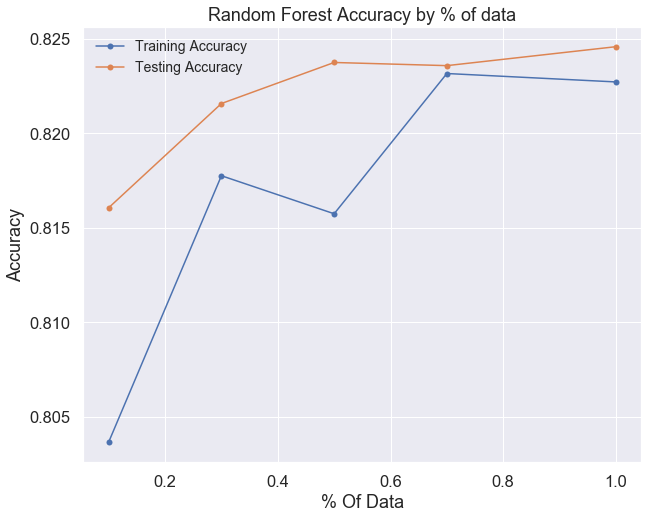

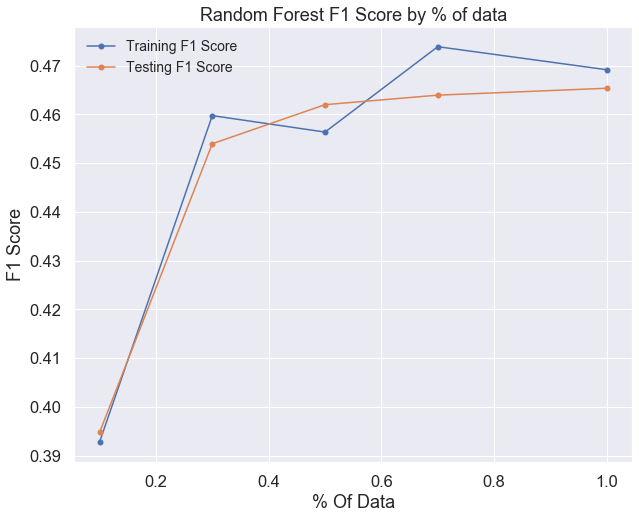

In [1533]:
sns.set(font_scale=1.5)
# This will plot the accuracies as a function of % of data.

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot()
ax1.plot(percents, train_acc, '-o', label='Training Accuracy')
ax1.plot(percents ,test_acc, '-o', label='Testing Accuracy')
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("% Of Data")
plt.title('Random Forest Accuracy by % of data')
plt.legend(fontsize=14)
plt.show()


# This will plot the f1 score as a function of % of data.

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot()
ax1.plot(percents, train_f1, '-o', label='Training F1 Score')
ax1.plot(percents ,test_f1, '-o', label='Testing F1 Score')
ax1.set_ylabel("F1 Score")
ax1.set_xlabel("% Of Data")
plt.title('Random Forest F1 Score by % of data')
plt.legend(fontsize=14)
plt.show()

It seems that the score doesn't improve when we go from 70% to 100%. Hence, we wouldn't use more data.

# Stacking models - normal average

In [1671]:
pred_df = pred_df.drop('model_avg', axis=1)
pred_df.head()

,KNN_not_scaled,Beanchmark,KNN_scaled,Decision_tree,random_forest_pred,AdaBoost,logistic_regression,NN,default
0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [1675]:
from statsmodels.regression.linear_model import OLS

x_cols = ['ln_min_wage', 'arab', 'gender', 'constant']

ols = OLS(pred_df.default, pred_df.drop(['default', 'Beanchmark'], axis=1)).fit()

ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                default   R-squared (uncentered):                   0.314
Model:                            OLS   Adj. R-squared (uncentered):              0.313
Method:                 Least Squares   F-statistic:                              391.1
Date:                Sun, 05 Jul 2020   Prob (F-statistic):                        0.00
Time:                        08:42:25   Log-Likelihood:                         -2836.0
No. Observations:                5986   AIC:                                      5686.
Df Residuals:                    5979   BIC:                                      5733.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
KNN_not_scaled          0.0962      0.049      1.974      0.048       0.001       0.192
KNN_scaled              0.1472      0.044      3.374      0.001       0.062       0.233
Decision_tree           0.1861      0.025      7.403      0.000       0.137       0.235
random_forest_pred      0.0234      0.047      0.503      0.615      -0.068       0.115
AdaBoost                0.2108      0.015     13.613      0.000       0.180       0.241
logistic_regression     0.1978      0.044      4.498      0.000       0.112       0.284
NN                      0.1758      0.030      5.773      0.000       0.116       0.235
==============================================================================
Omnibus:                     1070.260   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1880.632
Skew:                           1.148   Prob(JB):                         0.00
Kurtosis:                       4.507   Cond. No.                         8.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1682]:
dic = dict(ols.params)
sum_params = sum(dic.values())

1.037255629238106

In [1704]:
compare = pd.DataFrame(columns=['Model', 'weight'])
compare['Model'] = dic.keys()
compare['weight'] = dic.values()
norm_weight = [param/sum_params for param in ols.params]
compare['norm_weight'] = norm_weight
c = compare
compare

,Model,weight,norm_weight
0,KNN_not_scaled,0.10,0.09
1,KNN_scaled,0.15,0.14
2,Decision_tree,0.19,0.18
3,random_forest_pred,0.02,0.02
4,AdaBoost,0.21,0.20
5,logistic_regression,0.20,0.19
6,NN,0.18,0.17


In [1715]:
compare = c
compare_t = compare.T
compare_t = compare_t.rename(columns=compare_t.iloc[0])
compare_t = compare_t.iloc[1:]
compare = compare_t.T
compare_t

,KNN_not_scaled,KNN_scaled,Decision_tree,random_forest_pred,AdaBoost,logistic_regression,NN
weight,0.10,0.15,0.19,0.02,0.21,0.20,0.18
norm_weight,0.09,0.14,0.18,0.02,0.20,0.19,0.17


In [1728]:
pred_df['final_model'] = compare_t.iloc[0]['KNN_not_scaled']*pred_df.KNN_not_scaled\
    + compare_t.iloc[0]['KNN_scaled']*pred_df.KNN_scaled\
    + compare_t.iloc[0]['Decision_tree']*pred_df.Decision_tree\
    + compare_t.iloc[0]['random_forest_pred']*pred_df.Decision_tree\
    + compare_t.iloc[0]['AdaBoost']*pred_df.AdaBoost\
    + compare_t.iloc[0]['logistic_regression']*pred_df.logistic_regression\
    + compare_t.iloc[0]['NN']*pred_df.NN


pred_df.final_model = pred_df.final_model.round()
pred_df.head()


,KNN_not_scaled,Beanchmark,KNN_scaled,Decision_tree,random_forest_pred,AdaBoost,logistic_regression,NN,default,final_model
0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
2,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...
5981,0.00,0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
5982,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5983,0.00,0,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
5984,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [1729]:
pred_df['final_norm_model'] = compare_t.iloc[1]['KNN_not_scaled']*pred_df.KNN_not_scaled\
    + compare_t.iloc[1]['KNN_scaled']*pred_df.KNN_scaled\
    + compare_t.iloc[1]['Decision_tree']*pred_df.Decision_tree\
    + compare_t.iloc[1]['random_forest_pred']*pred_df.Decision_tree\
    + compare_t.iloc[1]['AdaBoost']*pred_df.AdaBoost\
    + compare_t.iloc[1]['logistic_regression']*pred_df.logistic_regression\
    + compare_t.iloc[1]['NN']*pred_df.NN


pred_df.final_norm_model = pred_df.final_norm_model.round()
pred_df.head()

,KNN_not_scaled,Beanchmark,KNN_scaled,Decision_tree,random_forest_pred,AdaBoost,logistic_regression,NN,default,final_model,final_norm_model
0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [1731]:
acc = []
f1 = []
models = pred_df.drop('default', axis=1).columns

for model in models:
    acc.append(sk.metrics.accuracy_score(pred_df.default, pred_df[model]))
    f1.append(sk.metrics.f1_score(pred_df.default, pred_df[model]))

comparison = pd.DataFrame({'Model': models, 'Accuracy': acc, 'F1 Score': f1})
comparison

,Model,Accuracy,F1 Score
0,KNN_not_scaled,0.78,0.14
1,Beanchmark,0.78,0.00
2,KNN_scaled,0.78,0.16
3,Decision_tree,0.82,0.47
4,random_forest_pred,0.82,0.47
5,AdaBoost,0.78,0.45
6,logistic_regression,0.82,0.46
7,NN,0.82,0.47
8,final_model,0.82,0.46
9,final_norm_model,0.82,0.46


Text(0.5, 1.0, 'Accuracy Comparison by Model')

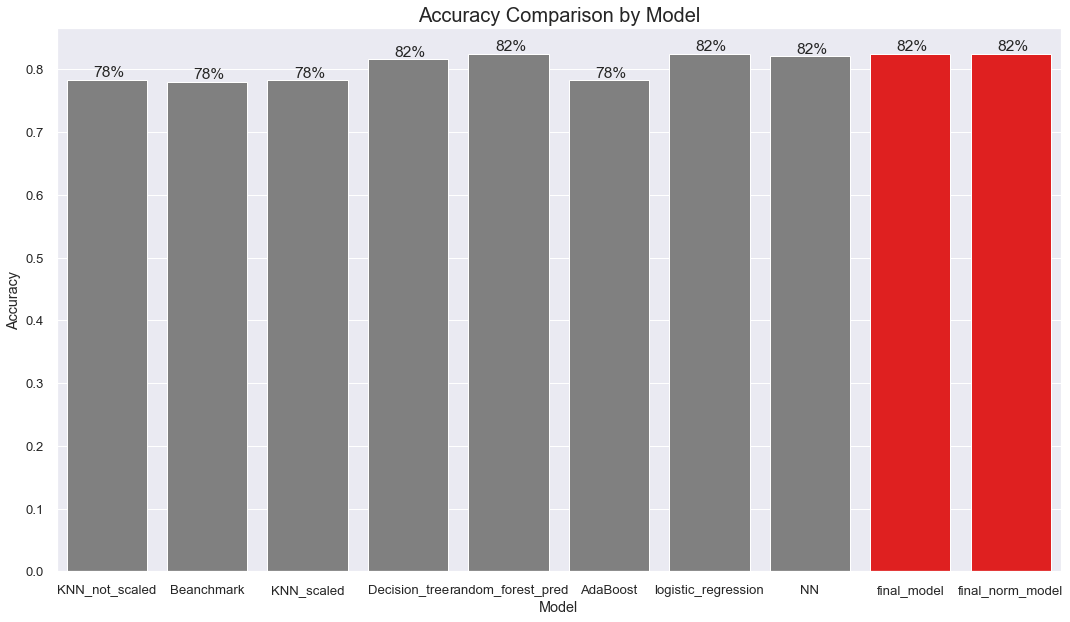

In [1738]:
fig, ax = plt.subplots(figsize=(18,10))
sns.set(font_scale=1.3)

values = comparison.Accuracy.values
clrs = ['grey' if (x < max(values)) else 'red' for x in values ]

graph = sns.barplot(x="Model", y="Accuracy", data=comparison, palette=clrs)

for p in graph.patches:
        graph.annotate('{:.0f}%'.format(p.get_height()*100), (p.get_x()+0.42, p.get_height()),
                    ha='center', va='bottom')
plt.title("Accuracy Comparison by Model", fontsize=20)

# Stacking models - with Sklearn function

In [1736]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot


# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models


# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>lr 0.817 (0.005)
>knn 0.792 (0.006)
>cart 0.724 (0.009)
>svm 0.816 (0.006)
>bayes 0.759 (0.005)


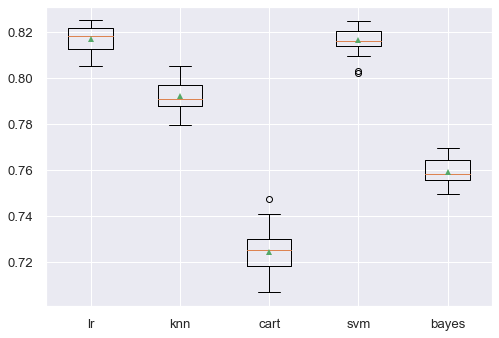

In [1737]:
X, y = scaled_df.drop('default', axis=1), scaled_df.default
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [1745]:
from sklearn.ensemble import StackingClassifier


def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [1746]:
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

In [ ]:
X, y = scaled_df.drop('default', axis=1), scaled_df.default

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

>lr 0.817 (0.005)
>knn 0.792 (0.006)
>cart 0.724 (0.008)


# Thank you for your time!

Again, any comments will be welcomed